# Solução do Problema do Caixeiro Viajante
## Tech Challenge FIAP - IA para devs

Este notebook implementa uma solução para o Problema do Caixeiro Viajante usando uma abordagem de Algoritmo Genético.

## Descrição do Problema
O Problema do Caixeiro Viajante (PCV) é um problema clássico de otimização onde precisamos encontrar a menor rota possível que visite cada cidade exatamente uma vez e retorne à cidade inicial.

## Implementação
Utilizaremos um algoritmo genético com os seguintes componentes:
- Geração aleatória da população
- Cálculo de aptidão baseado na distância da rota
- Crossover ordenado para gerar novas soluções
- Mutação para manter a diversidade
- Elitismo para preservar a melhor solução

In [1]:
# Importação das bibliotecas necessárias
import random
import math 
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np

# Para garantir reprodutibilidade dos resultados
random.seed(42)

In [2]:
# Problemas de exemplo com diferentes quantidades de cidades
default_problems = {
    5: [(733, 251), (706, 87), (546, 97), (562, 49), (576, 253)],
    10: [(470, 169), (602, 202), (754, 239), (476, 233), (468, 301), 
         (522, 29), (597, 171), (487, 325), (746, 232), (558, 136)],
    12: [(728, 67), (560, 160), (602, 312), (712, 148), (535, 340),
         (720, 354), (568, 300), (629, 260), (539, 46), (634, 343),
         (491, 135), (768, 161)],
    15: [(512, 317), (741, 72), (552, 50), (772, 346), (637, 12),
         (589, 131), (732, 165), (605, 15), (730, 38), (576, 216),
         (589, 381), (711, 387), (563, 228), (494, 22), (787, 288)],
    100: [
     (-74.006, 40.714, "New York"),  # New York
     (-118.243, 34.052, "Los Angeles"),  # Los Angeles
     (151.207, -33.867, "Sydney"),  # Sydney
     (2.352, 48.856, "Paris"),    # Paris
     (139.691, 35.689, "Tokyo"),  # Tokyo
     (-43.172, -22.906, "Rio de Janeiro"),  # Rio de Janeiro
     (37.617, 55.755, "Moscow"),   # Moscow
     (-79.383, 43.653, "Toronto"),  # Toronto
     (28.979, 41.008, "Istanbul"),   # Istanbul
     (121.465, 31.230, "Shanghai"),  # Shanghai
     (103.851, 1.290, "Singapore"  ),   # Singapore
     (-58.381, -34.603, "Buenos Aires"),  # Buenos Aires
     (13.404, 52.520, "Berlin"),   # Berlin
     (-0.127, 51.507, "London"),   # London
     (77.209, 28.613, "New Delhi"),   # New Delhi
     (31.233, 30.044, "Cairo"),   # Cairo
     (-99.133, 19.432, "Mexico City"),  # Mexico City
     (116.407, 39.904, "Beijing"),  # Beijing
     (12.496, 41.902, "Rome"),   # Rome
     (-70.648, -33.459, "Santiago"),  # Santiago
     (144.963, -37.814, "Melbourne"),  # Melbourne
     (-3.703, 40.416, "Madrid"),   # Madrid
     (55.270, 25.204, "Dubai"),   # Dubai
     (126.978, 37.566, "Seoul"),  # Seoul
     (100.501, 13.756, "Bangkok"),  # Bangkok
     (18.423, -33.918, "Cape Town"),  # Cape Town
     (-77.042, -12.046, "Lima"),  # Lima
     (4.897, 52.377, "Amsterdam"),    # Amsterdam
     (174.763, -36.848, "Auckland"),  # Auckland
     (120.979, 14.599, "Manila"),  # Manila
     (-6.249, 53.349, "Dublin"),   # Dublin
     (101.686, 3.139, "Kuala Lumpur"),   # Kuala Lumpur
     (73.856, 18.520, "Pune"),   # Pune
     (-75.578, 6.244, "Medellin"),   # Medellin     
     (30.523, 50.450, "Kiev"),   # Kiev
     (114.109, 22.396, "Hong Kong"),  # Hong     Kong
     (-90.548, 14.628, "Guatemala City"),  # Guatemala City
     (7.491, 9.072, "Abuja"),     # Abu
     (106.845, -6.208, "Jakarta"),  # Jakarta
     (85.324, 27.717, "Kathmandu"),   # Kathmandu
     (-66.903, 10.480, "Caracas"),  # Caracas
     (32.858, -13.133, "Lusaka"),  # Lusaka
     (35.495, 33.888, "Beirut"),   # Beirut
     (69.169, 34.555, "Kabul"),   # Kabul
     (44.391, 33.315, "Baghdad"),   # Baghdad
     (-17.384, 14.716, "Dakar"),  # Dakar
     (90.407, 23.811, "Dhaka"),   # Dhaka
     (36.817, -1.292, "Nairobi"),   # Nairobi
     (47.481, -18.879, "Antananarivo"),  # Antananarivo
     (51.421, 35.689, "Tehran"),   # Tehran
     (138.933, -34.928, "Adelaide"),  # Adelaide
     (115.857, -31.950, "Perth"),  # Perth
     (72.877, 19.075, "Mumbai"),   # Mumbai
     (88.363, 22.572, "Kolkata"),   # Kolkata
     (80.278, 13.088, "Chennai"),   # Chennai
     (-84.388, 33.749, "Atlanta"),  # Atlanta
     (-87.629, 41.878, "Chicago"),  # Chicago
     (-71.058, 42.360, "Boston"),  # Boston
     (-122.419, 37.774, "San Francisco"),  # San Francisco
     (-95.369, 29.760, "Houston"),  # Houston
     (-80.191, 25.761, "Miami"),  # Miami
     (-123.121, 49.282, "Vancouver"),  # Vancouver
     (-114.070, 51.048, "Calgary"),  # Calgary
     (-73.567, 45.501, "Montreal"),  # Montreal
     (-78.878, -2.203, "Quito"),  # Quito
     (-57.333, -25.282, "Asuncion"),  # Asuncion
     (-56.164, -34.901, "Montevideo"),  # Montevideo
     (23.727, 37.983, "Athens"),   # Athens
     (19.040, 47.497, "Budapest"),   # Budapest
     (21.012, 52.229, "Warsaw"),   # Warsaw
     (14.514, 46.056, "Ljubljana"),   # Ljubljana
     (16.373, 48.208, "Vienna"),   # Vienna
    ]
}

In [3]:
def plot_route(cities: List[Tuple[float, float, str]], route: List[Tuple[float, float, str  ]], title: str = "Rota do Caixeiro Viajante"):
    """Plotar a rota do caixeiro viajante."""
    plt.figure(figsize=(30, 30))
    
    # Plotar cidades
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    plt.scatter(x, y, c='red', s=100)
    
    # Plotar rota
    route_x = [city[0] for city in route]
    route_y = [city[1] for city in route]
    
    # Adicionar retorno à cidade inicial
    route_x.append(route_x[0])
    route_y.append(route_y[0])
    
    plt.plot(route_x, route_y, 'b-')
    
    # Adicionar números das cidades
    for i, (x, y, name) in enumerate(route):
        plt.annotate(f'{name}:{i}', (x, y), xytext=(5, 5), textcoords='offset points')
    
    plt.title(title)
    plt.grid(True)
    plt.show()
    print(route)


In [4]:
def calculate_distance(city1: Tuple[float, float], city2: Tuple[float, float]) -> float:
    """Calcular a distância euclidiana entre duas cidades."""
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def calculate_route_distance(route: List[Tuple[float, float]]) -> float:
    """Calcular a distância total de uma rota."""
    total_distance = 0
    for i in range(len(route)):
        total_distance += calculate_distance(route[i], route[(i + 1) % len(route)])
    return total_distance

def calculate_fitness(route: List[Tuple[float, float]]) -> float:
    """Calcular a aptidão de uma rota (inverso da distância total)."""
    return calculate_route_distance(route)

def generate_random_population(cities: List[Tuple[float, float]], population_size: int) -> List[List[Tuple[float, float]]]:
    """Gerar uma população inicial aleatória."""
    population = []
    for _ in range(population_size):
        # Criar uma cópia aleatória das cidades
        new_route = cities.copy()
        random.shuffle(new_route)
        population.append(new_route)
    return population

def sort_population(population: List[List[Tuple[float, float]]], fitness_values: List[float]) -> Tuple[List[List[Tuple[float, float]]], List[float]]:
    """Ordenar população por aptidão (menor distância primeiro)."""
    sorted_pairs = sorted(zip(population, fitness_values), key=lambda x: x[1])
    return zip(*sorted_pairs)

def order_crossover(parent1: List[Tuple[float, float]], parent2: List[Tuple[float, float]]) -> List[Tuple[float, float]]:
    """Realizar crossover ordenado entre dois pais."""
    size = len(parent1)
    # Escolher dois pontos de corte aleatórios
    start, end = sorted(random.sample(range(size), 2))
    
    # Criar filho com segmento do primeiro pai
    child = [None] * size
    for i in range(start, end + 1):
        child[i] = parent1[i]
    
    # Preencher o resto com genes do segundo pai, mantendo a ordem
    remaining_cities = [city for city in parent2 if city not in child[start:end + 1]]
    j = 0
    for i in range(size):
        if child[i] is None:
            child[i] = remaining_cities[j]
            j += 1
    
    return child

def mutate(route: List[Tuple[float, float]], probability: float) -> List[Tuple[float, float]]:
    """Aplicar mutação em uma rota (troca de duas cidades)."""
    if random.random() < probability:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]
    return route

In [5]:
def solve_tsp(cities: List[Tuple[float, float, str]], 
              population_size: int = 100,
              n_generations: int = 100,
              mutation_probability: float = 0.3,
              plot_progress: bool = True) -> Tuple[List[Tuple[float, float]], float, List[float]]:
    """Resolver o PCV usando algoritmo genético e retornar melhor rota, distância e progresso."""
    
    # Criar população inicial
    population = generate_random_population(cities, population_size)
    
    # Acompanhar progresso
    best_fitness_values = []
    best_solutions = []
    
    for generation in range(n_generations):
        # Calcular aptidão para todos os indivíduos
        population_fitness = [calculate_fitness(individual) for individual in population]
        
        # Ordenar população por aptidão
        population, population_fitness = sort_population(population, population_fitness)
        print(generation)
        print(population_fitness)
        # Armazenar melhor solução
        best_fitness = population_fitness[0]
        best_solution = population[0]
        
        best_fitness_values.append(best_fitness)
        best_solutions.append(best_solution)
        
        # Criar nova população
        new_population = [population[0]]  # Elitismo
        
        while len(new_population) < population_size:
            # Seleção
            parent1, parent2 = random.choices(population[:10], k=2)
            
            # Crossover
            child = order_crossover(parent1, parent2)
            
            # Mutação
            child = mutate(child, mutation_probability)
            
            new_population.append(child)
        
        population = new_population
        
        if plot_progress and generation % 100 == 0:
            plot_route(cities, best_solution, 
                      f"Geração {generation}: Distância = {best_fitness:.2f}")
    
    return best_solutions[-1], best_fitness_values[-1], best_fitness_values

## Testando a Implementação

Vamos resolver o PCV para diferentes tamanhos de problema e visualizar os resultados.

0
(6413.639697180535, 6466.366732496023, 6499.806388010692, 6564.751087681436, 6618.161526864338, 6808.450888323014, 6834.219233586765, 6837.653378462003, 6847.441765084837, 6847.445182736801, 6858.355662904115, 6882.245485662632, 6883.187047077906, 6885.46373028028, 6921.97554965731, 6954.665316492719, 6969.533329909982, 7012.497982561542, 7032.56306547482, 7055.2291859100305, 7066.563681513321, 7070.973803578807, 7072.883514311471, 7107.537770495631, 7110.455806008514, 7112.54510639544, 7126.712005616473, 7127.014174673558, 7147.523614965306, 7152.033787897671, 7175.757474994177, 7183.0385675710195, 7188.319175607889, 7233.491535749993, 7251.361930989798, 7261.45383231045, 7285.5258598680275, 7288.1456091222835, 7291.362663553739, 7298.386736677508, 7310.049444023679, 7338.598044907916, 7343.361315684525, 7353.431419256012, 7370.376773942281, 7371.581838493197, 7380.108843322109, 7406.895908660521, 7440.956024774324, 7449.5888382852745, 7475.643919363417, 7482.164928678739, 7493.0078

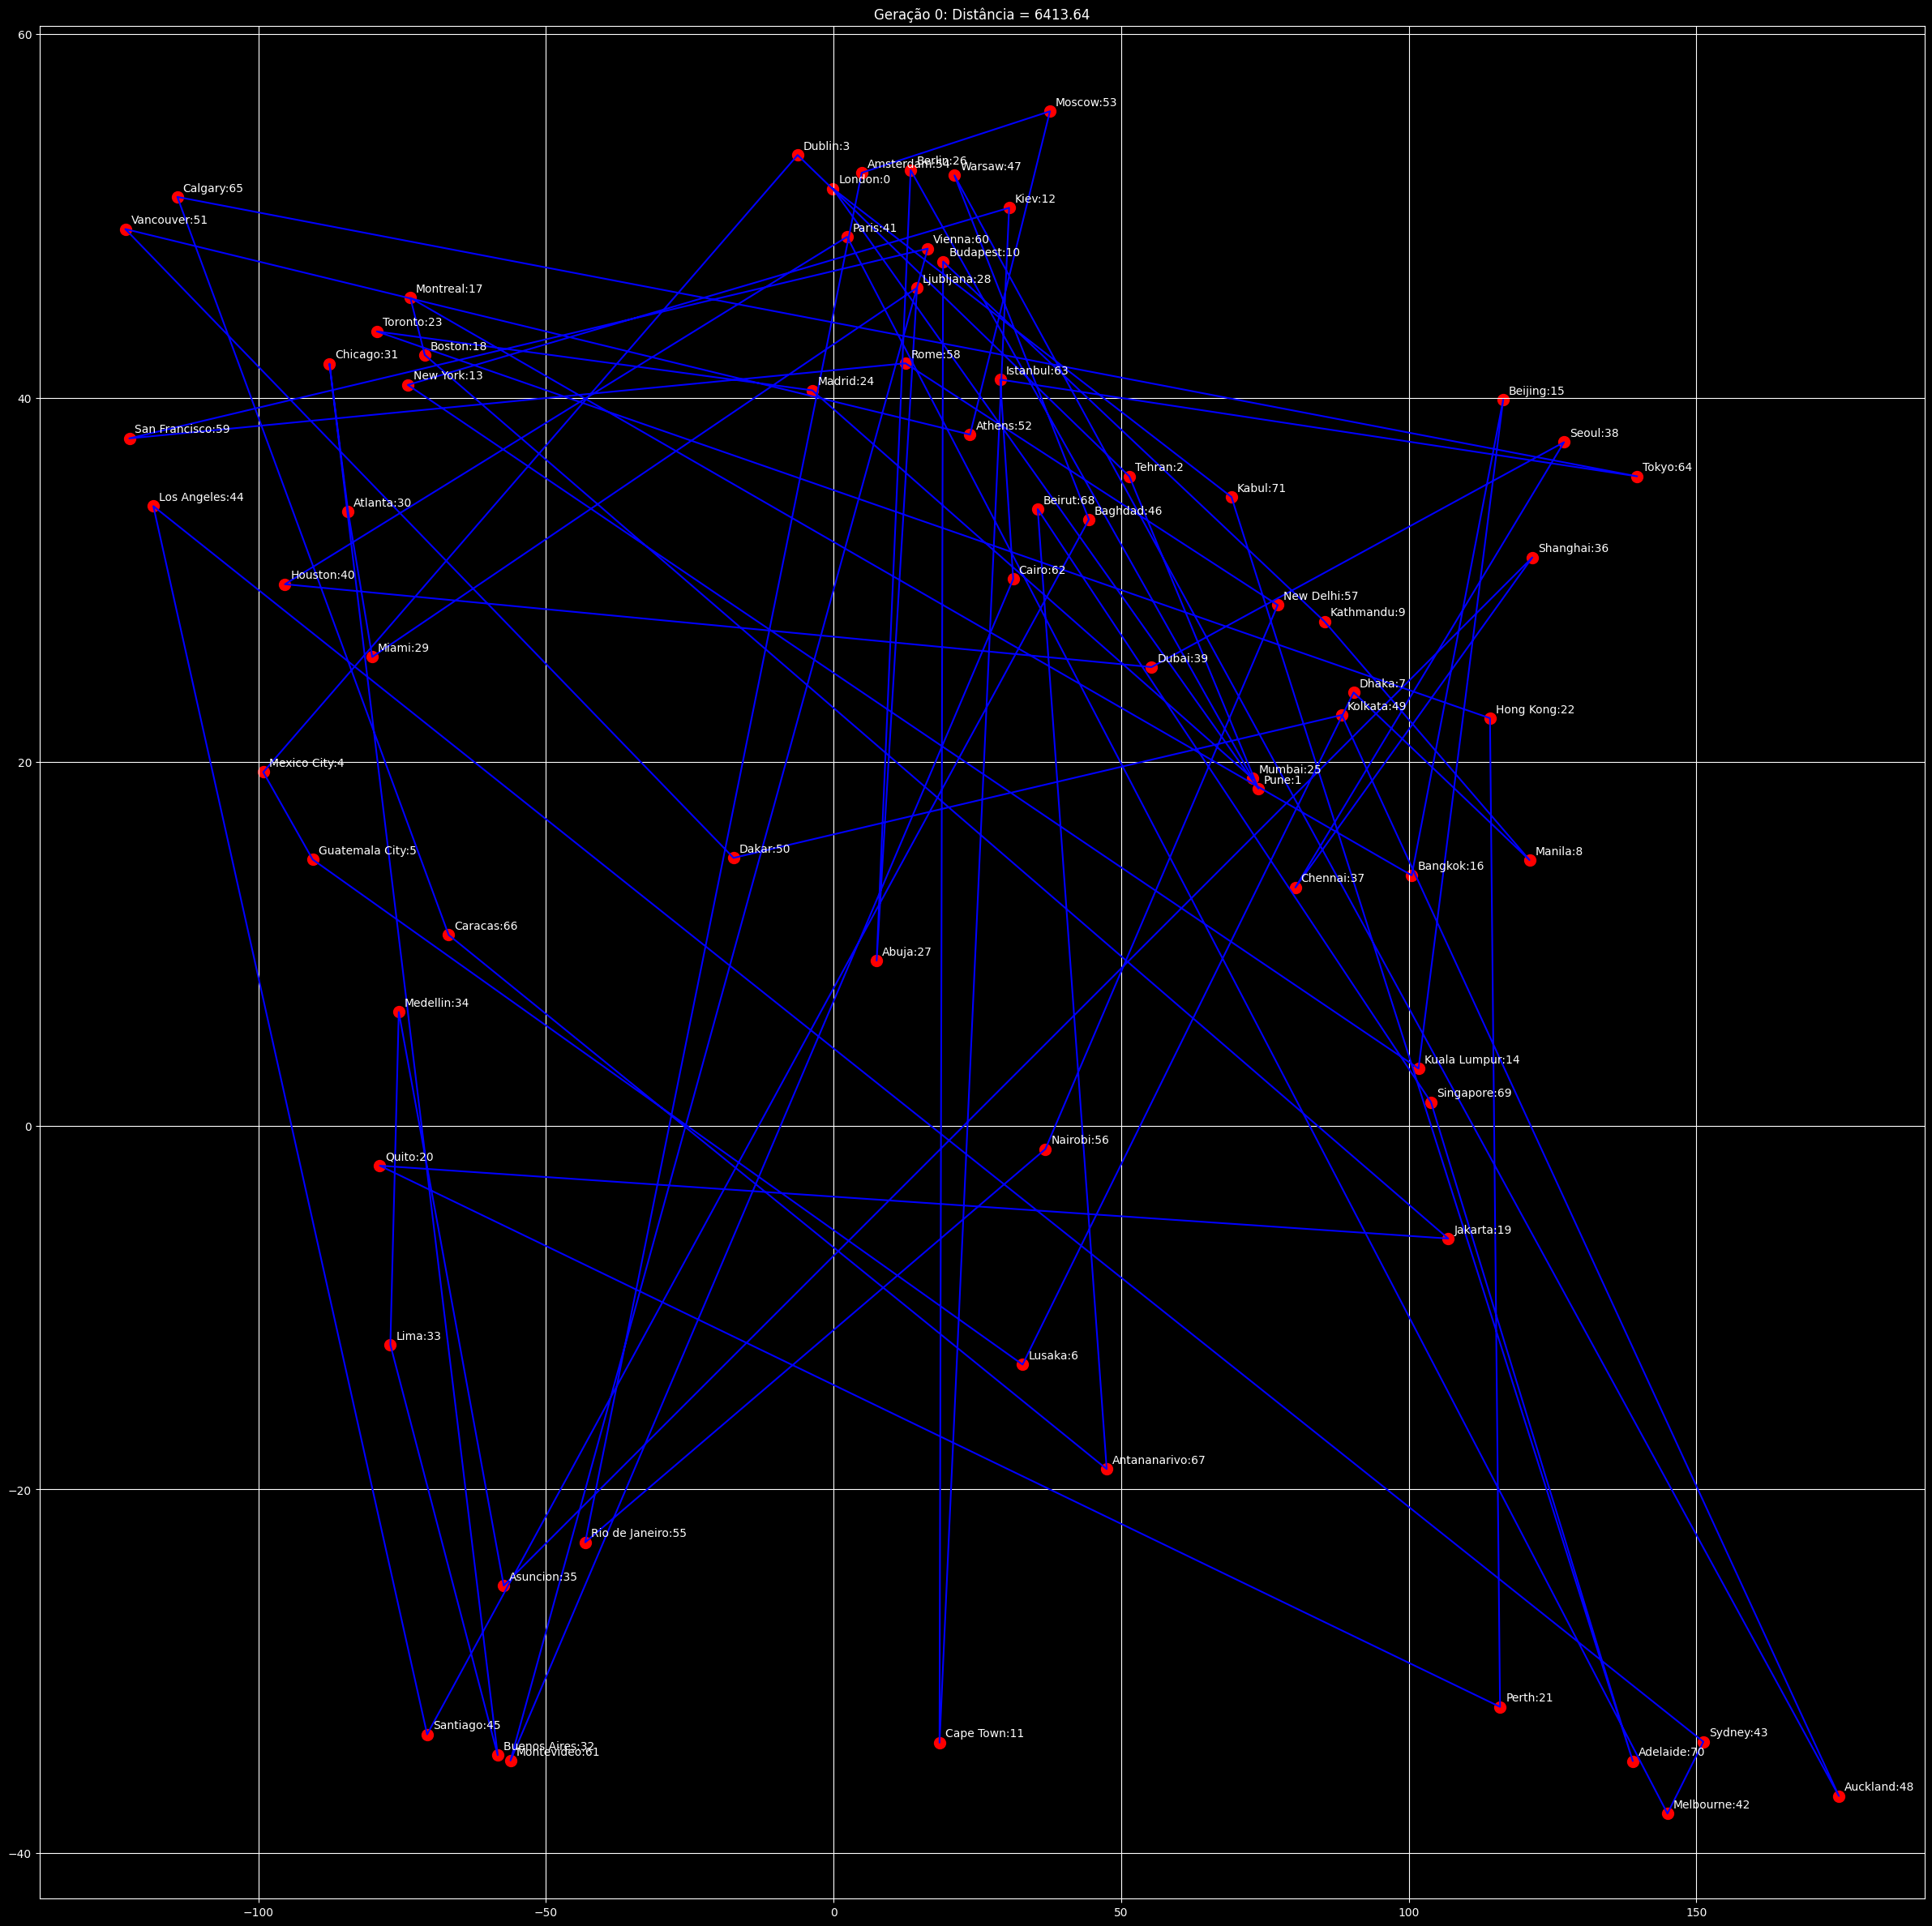

[(-0.127, 51.507, 'London'), (73.856, 18.52, 'Pune'), (51.421, 35.689, 'Tehran'), (-6.249, 53.349, 'Dublin'), (-99.133, 19.432, 'Mexico City'), (-90.548, 14.628, 'Guatemala City'), (32.858, -13.133, 'Lusaka'), (90.407, 23.811, 'Dhaka'), (120.979, 14.599, 'Manila'), (85.324, 27.717, 'Kathmandu'), (19.04, 47.497, 'Budapest'), (18.423, -33.918, 'Cape Town'), (30.523, 50.45, 'Kiev'), (-74.006, 40.714, 'New York'), (101.686, 3.139, 'Kuala Lumpur'), (116.407, 39.904, 'Beijing'), (100.501, 13.756, 'Bangkok'), (-73.567, 45.501, 'Montreal'), (-71.058, 42.36, 'Boston'), (106.845, -6.208, 'Jakarta'), (-78.878, -2.203, 'Quito'), (115.857, -31.95, 'Perth'), (114.109, 22.396, 'Hong Kong'), (-79.383, 43.653, 'Toronto'), (-3.703, 40.416, 'Madrid'), (72.877, 19.075, 'Mumbai'), (13.404, 52.52, 'Berlin'), (7.491, 9.072, 'Abuja'), (14.514, 46.056, 'Ljubljana'), (-80.191, 25.761, 'Miami'), (-84.388, 33.749, 'Atlanta'), (-87.629, 41.878, 'Chicago'), (-58.381, -34.603, 'Buenos Aires'), (-77.042, -12.046, 'Li

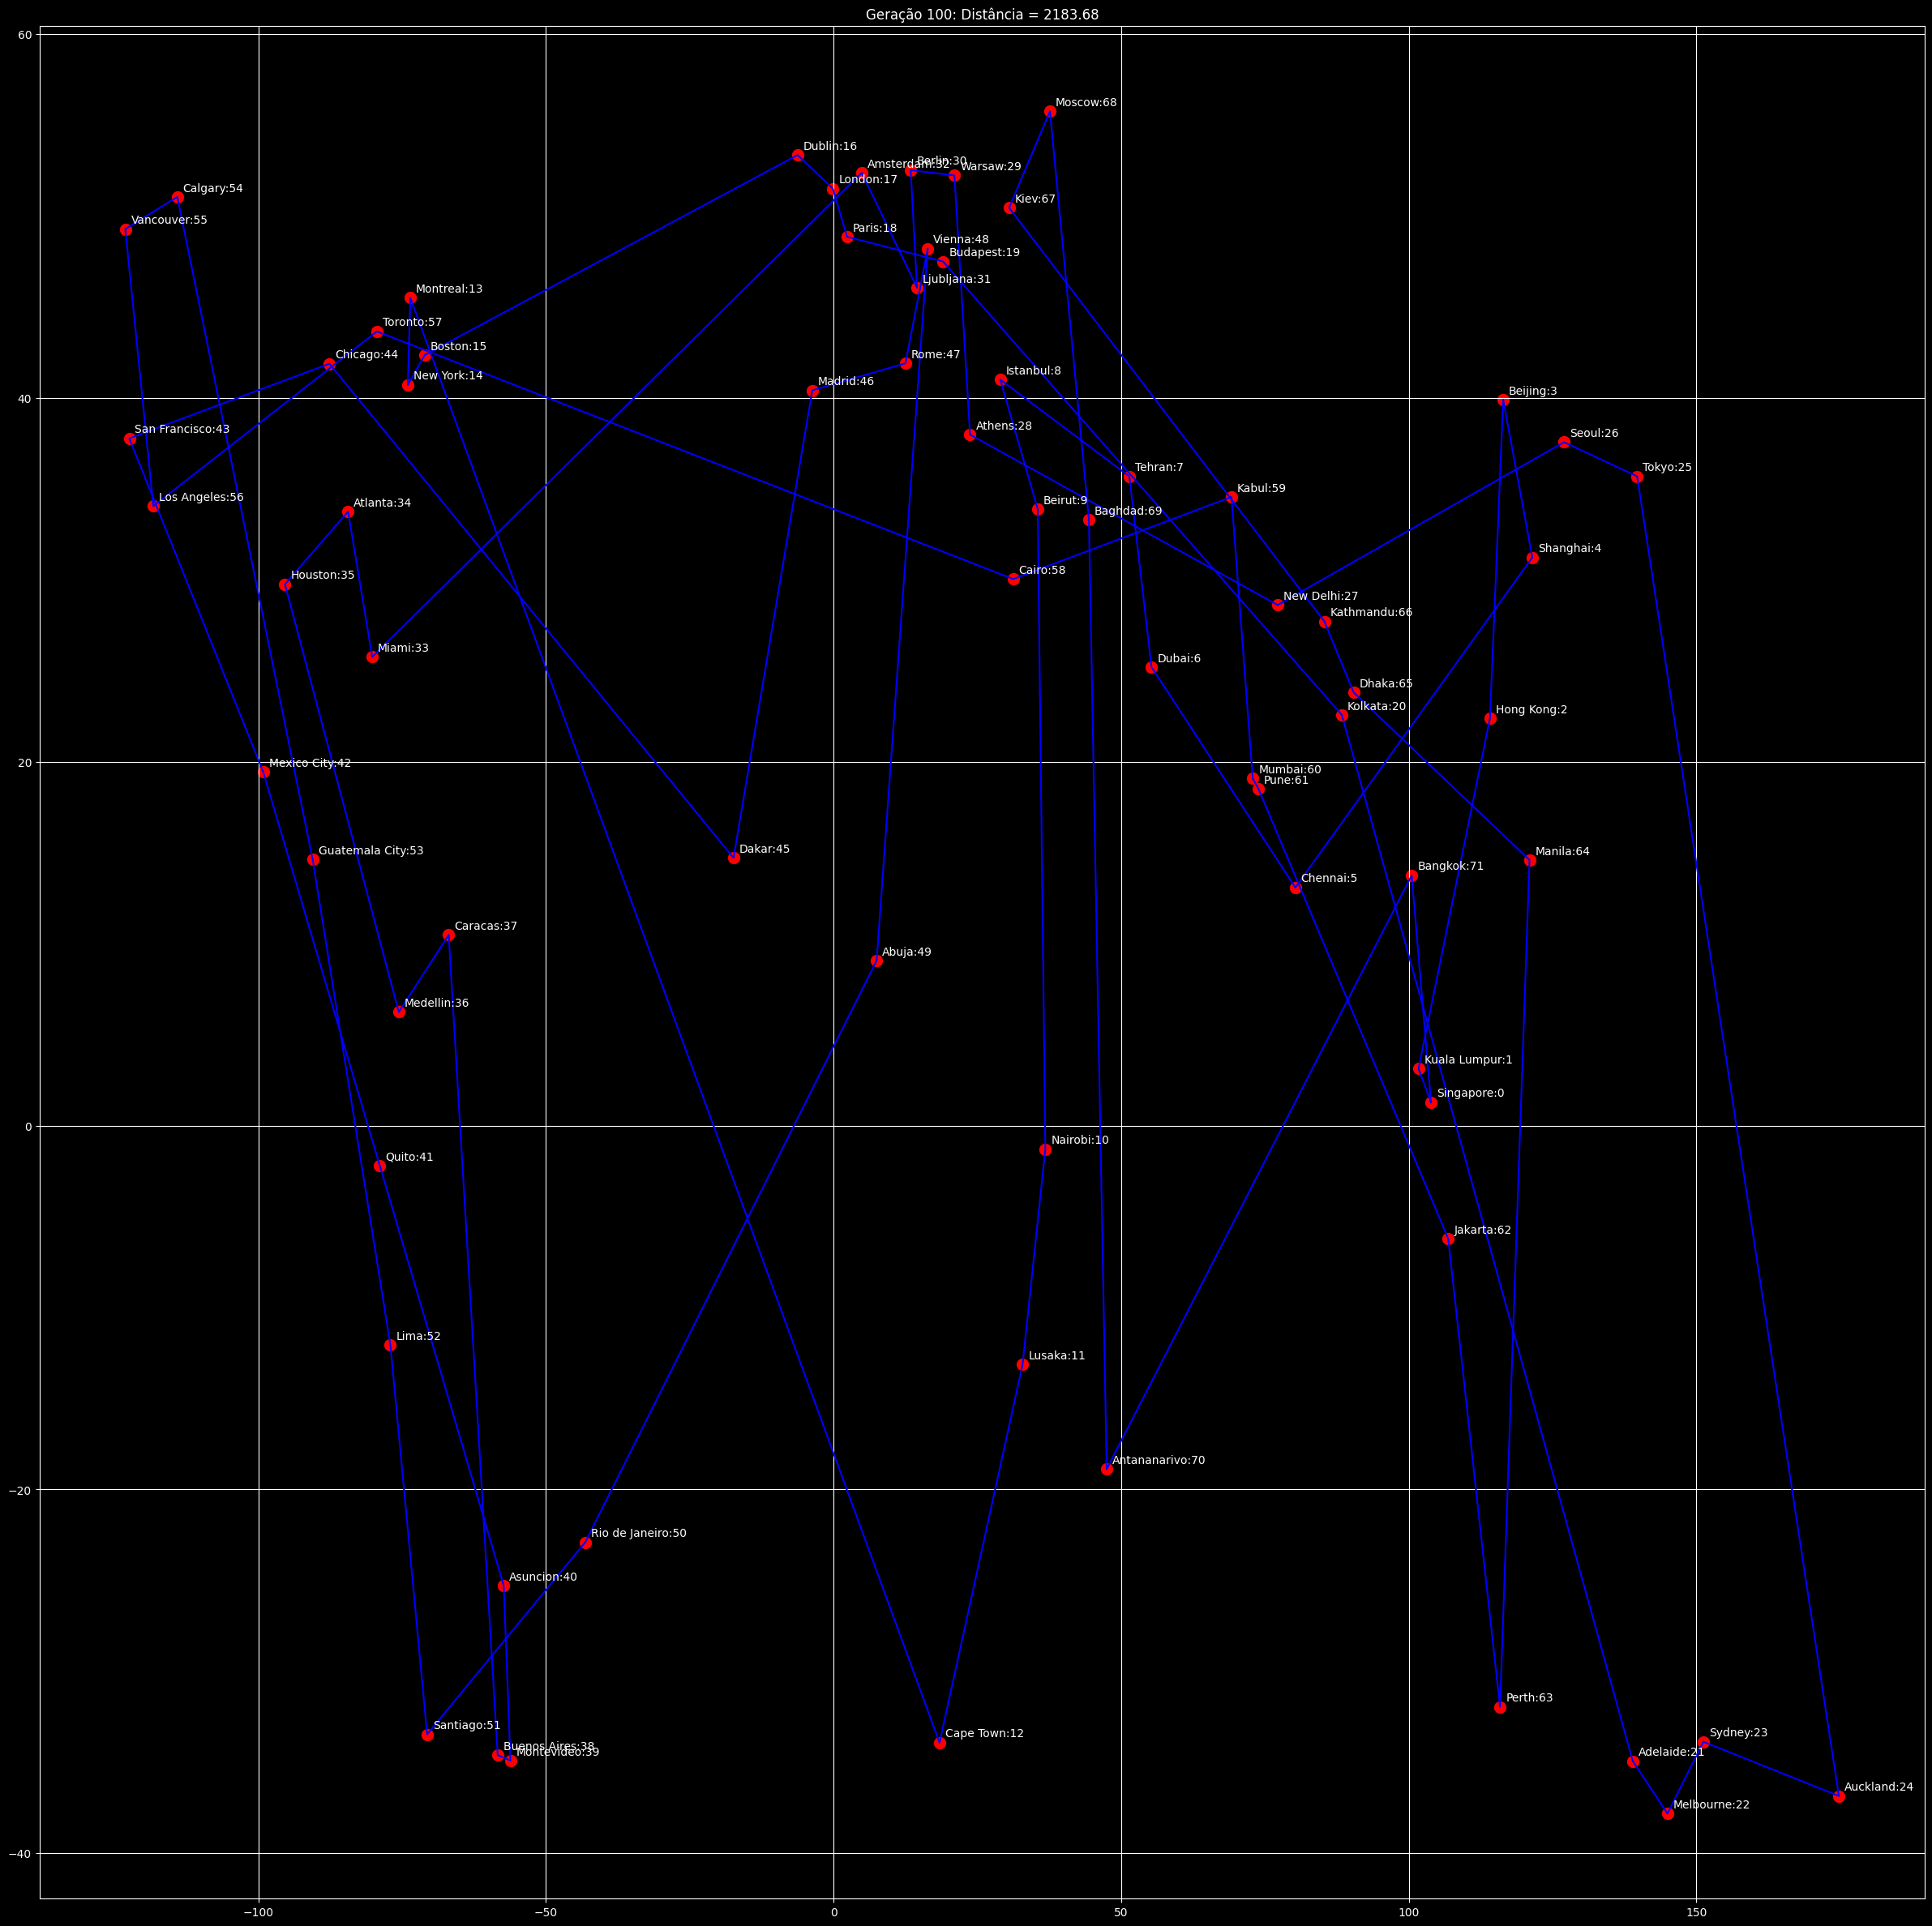

[(103.851, 1.29, 'Singapore'), (101.686, 3.139, 'Kuala Lumpur'), (114.109, 22.396, 'Hong Kong'), (116.407, 39.904, 'Beijing'), (121.465, 31.23, 'Shanghai'), (80.278, 13.088, 'Chennai'), (55.27, 25.204, 'Dubai'), (51.421, 35.689, 'Tehran'), (28.979, 41.008, 'Istanbul'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-73.567, 45.501, 'Montreal'), (-74.006, 40.714, 'New York'), (-71.058, 42.36, 'Boston'), (-6.249, 53.349, 'Dublin'), (-0.127, 51.507, 'London'), (2.352, 48.856, 'Paris'), (19.04, 47.497, 'Budapest'), (88.363, 22.572, 'Kolkata'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (77.209, 28.613, 'New Delhi'), (23.727, 37.983, 'Athens'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (14.514, 46.056, 'Ljubljana'), (4.897, 52.377, 'Amsterdam'), (-80.191, 25.761, 'Miami

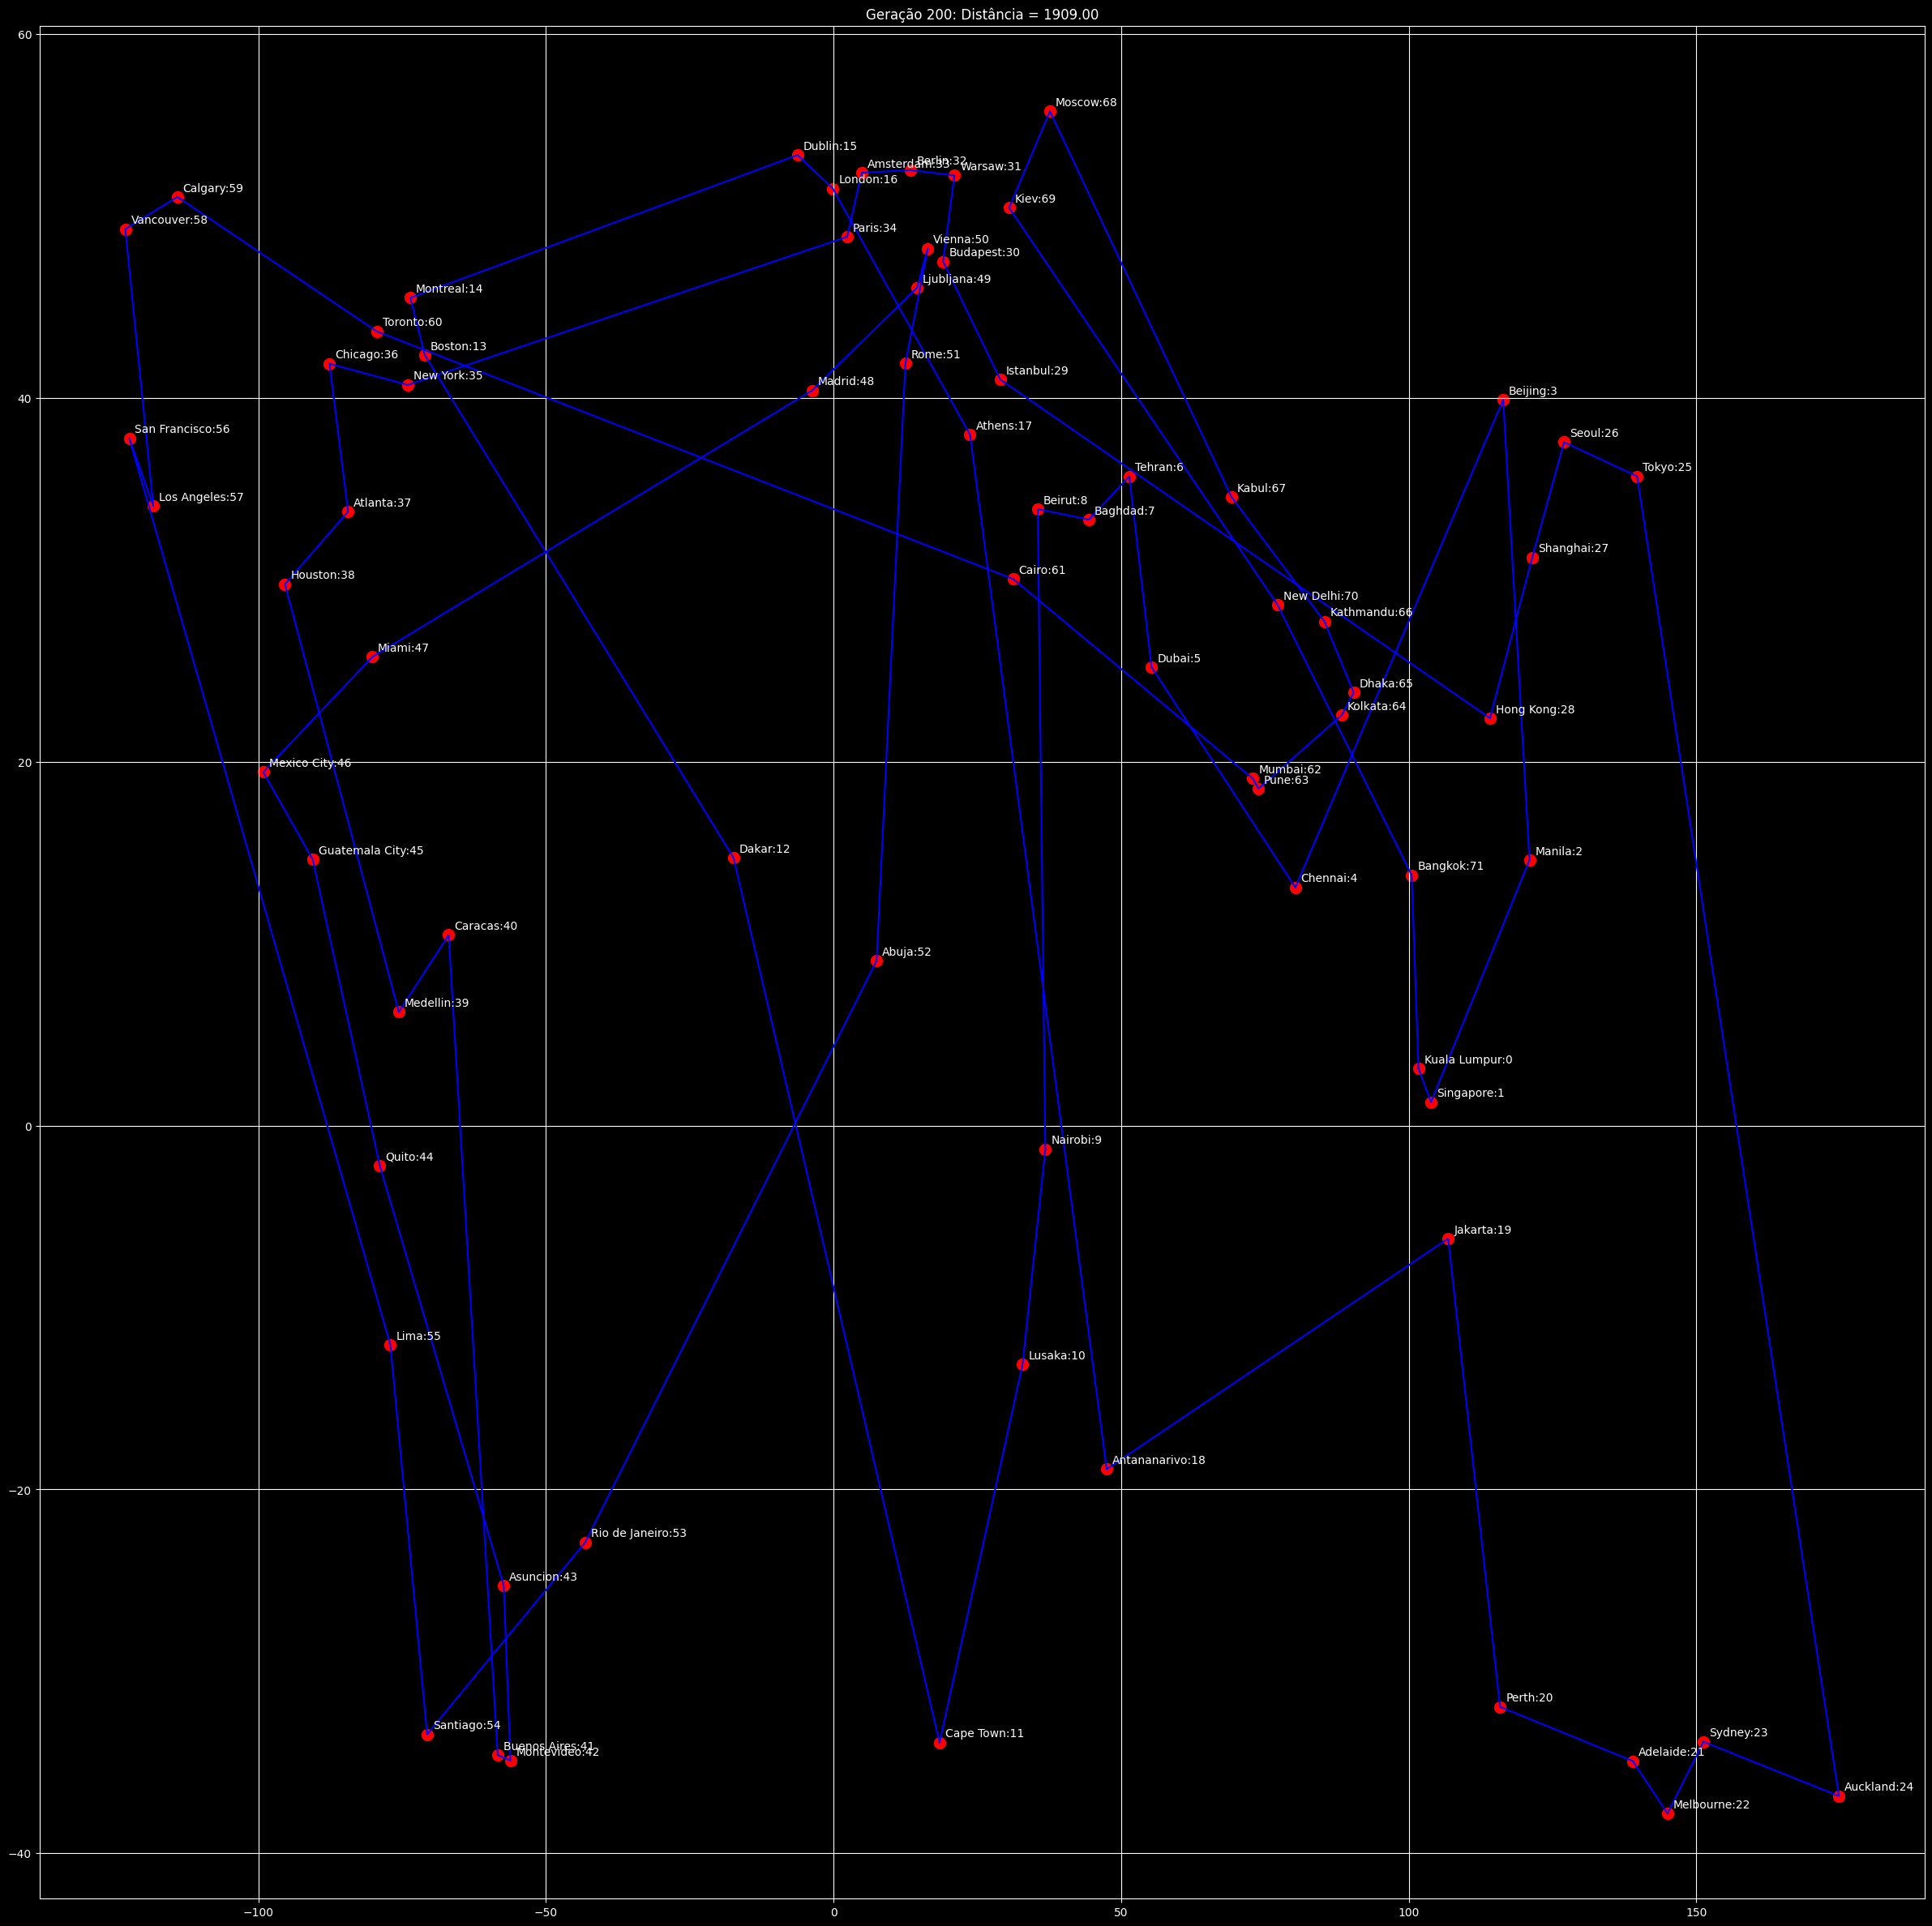

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (116.407, 39.904, 'Beijing'), (80.278, 13.088, 'Chennai'), (55.27, 25.204, 'Dubai'), (51.421, 35.689, 'Tehran'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-17.384, 14.716, 'Dakar'), (-71.058, 42.36, 'Boston'), (-73.567, 45.501, 'Montreal'), (-6.249, 53.349, 'Dublin'), (-0.127, 51.507, 'London'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (114.109, 22.396, 'Hong Kong'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 'Amster

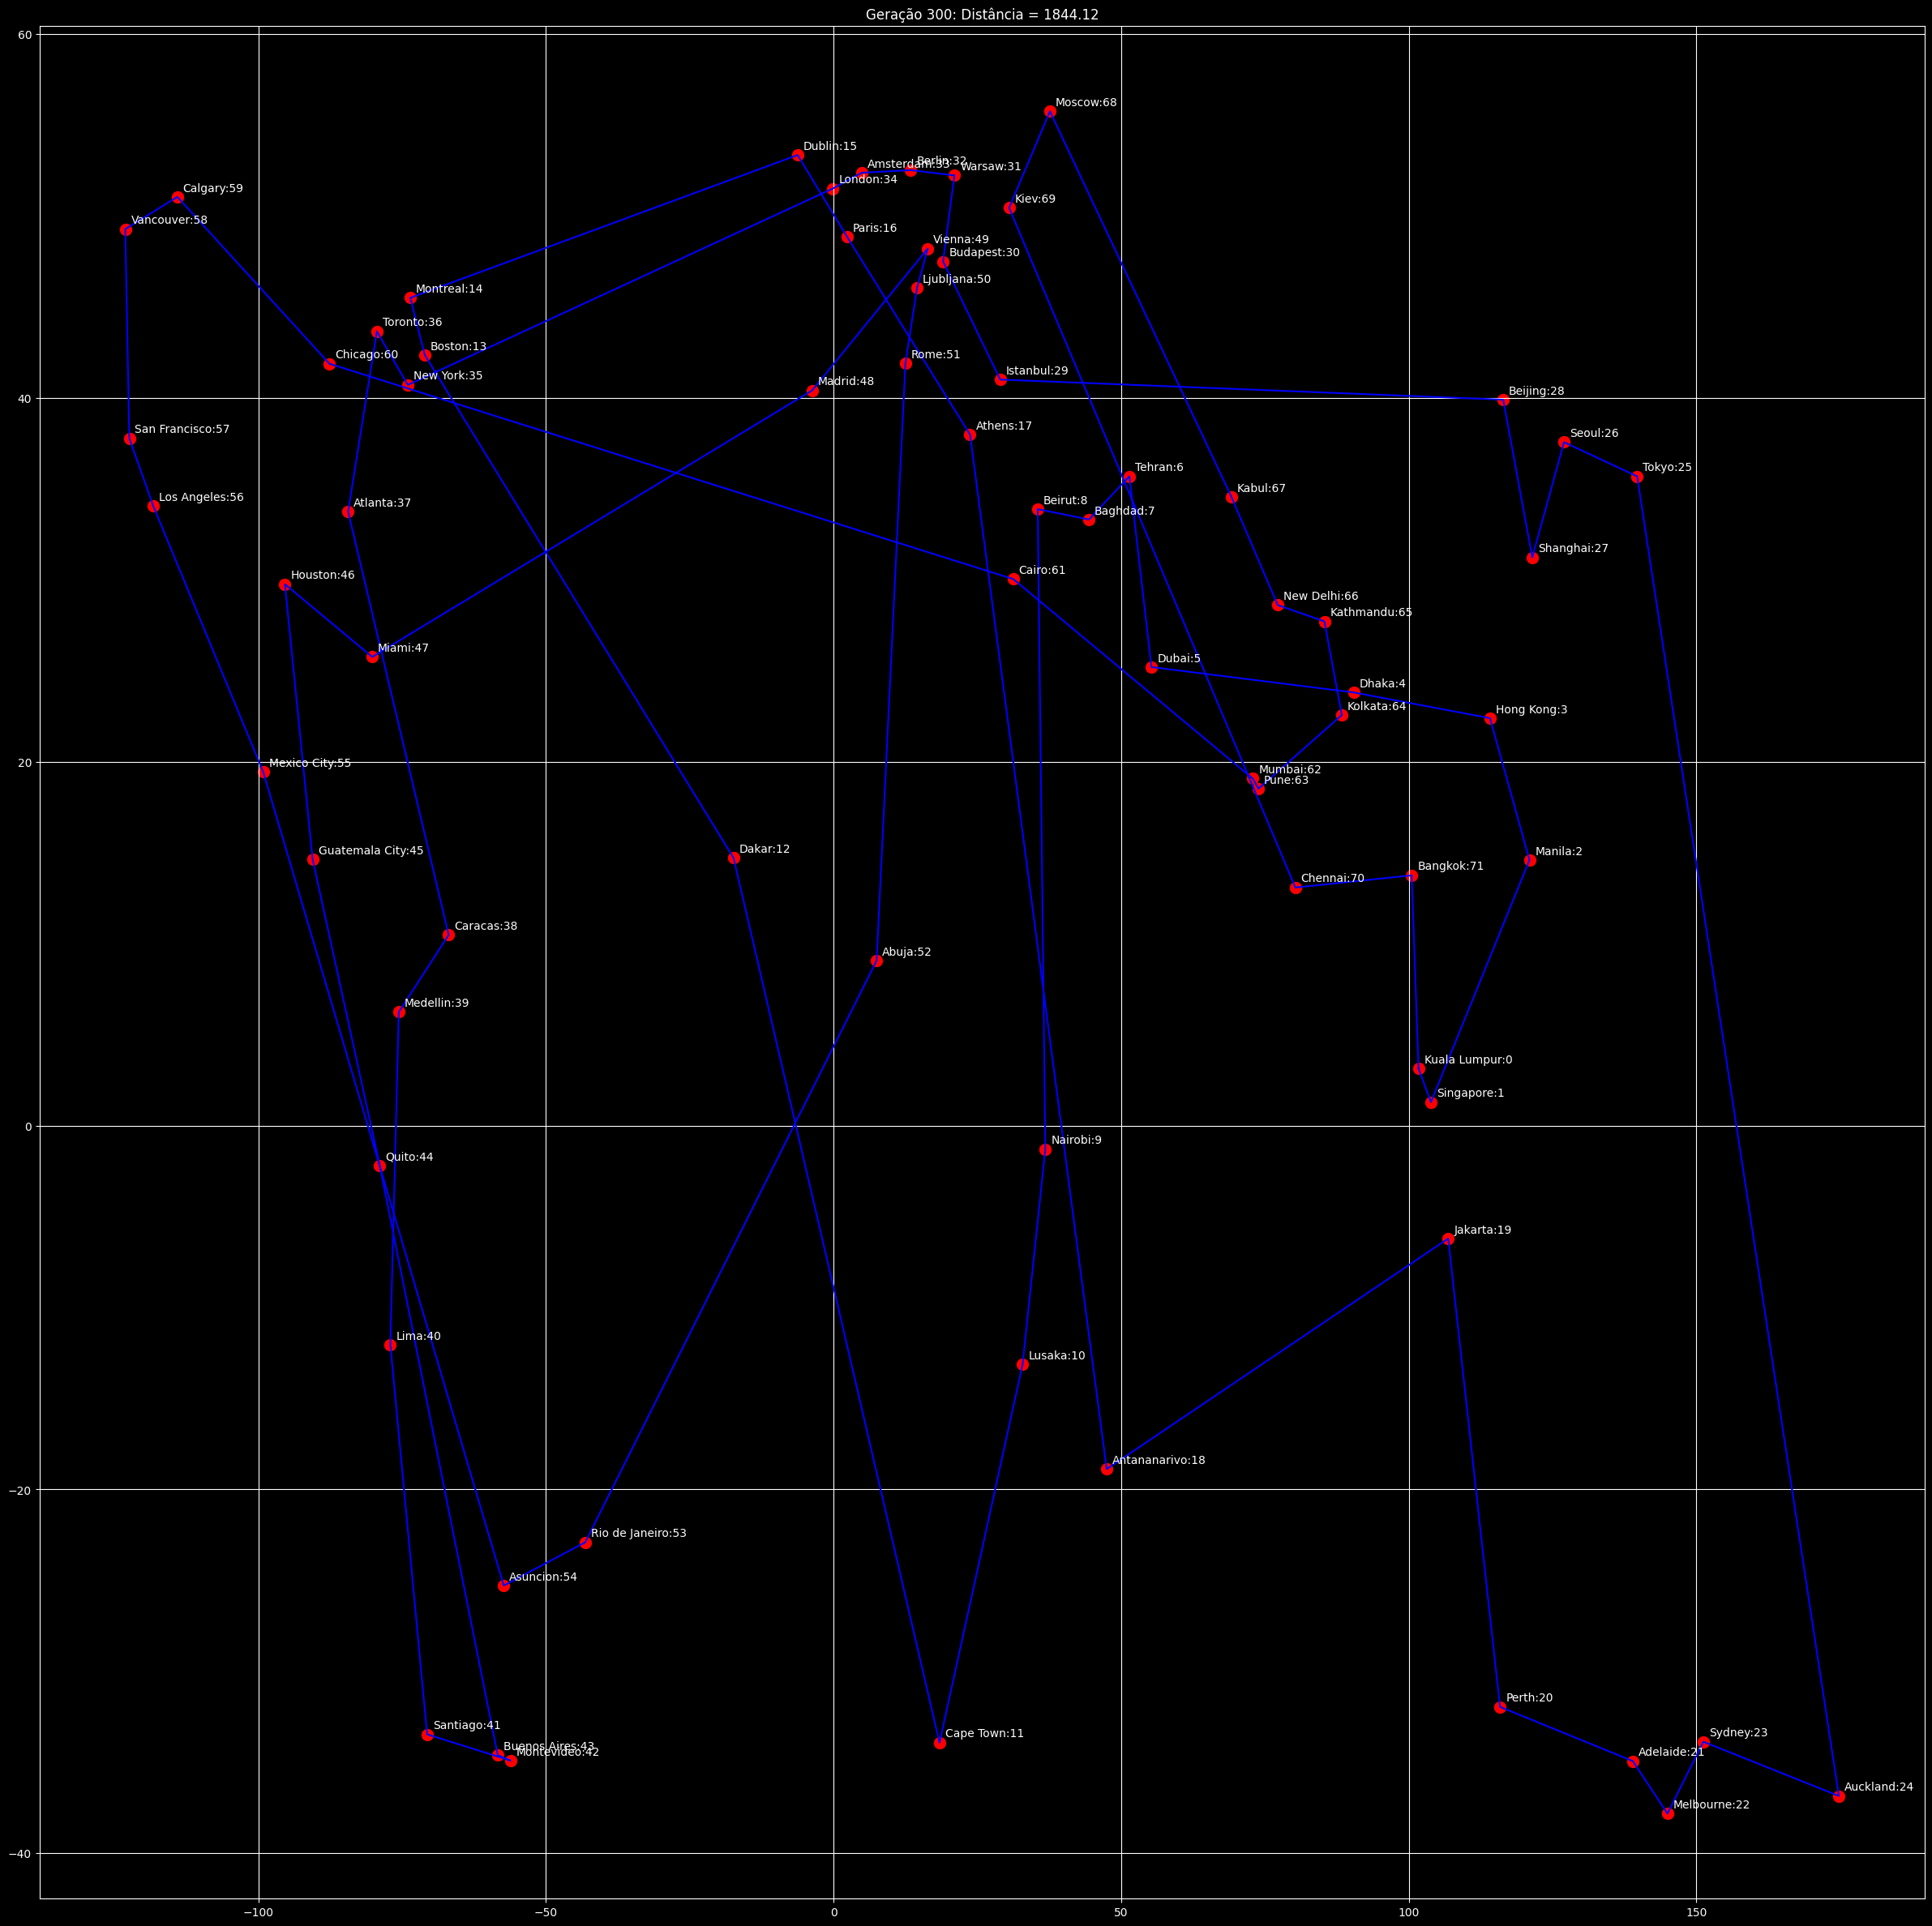

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (55.27, 25.204, 'Dubai'), (51.421, 35.689, 'Tehran'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-17.384, 14.716, 'Dakar'), (-71.058, 42.36, 'Boston'), (-73.567, 45.501, 'Montreal'), (-6.249, 53.349, 'Dublin'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 'Amsterdam'

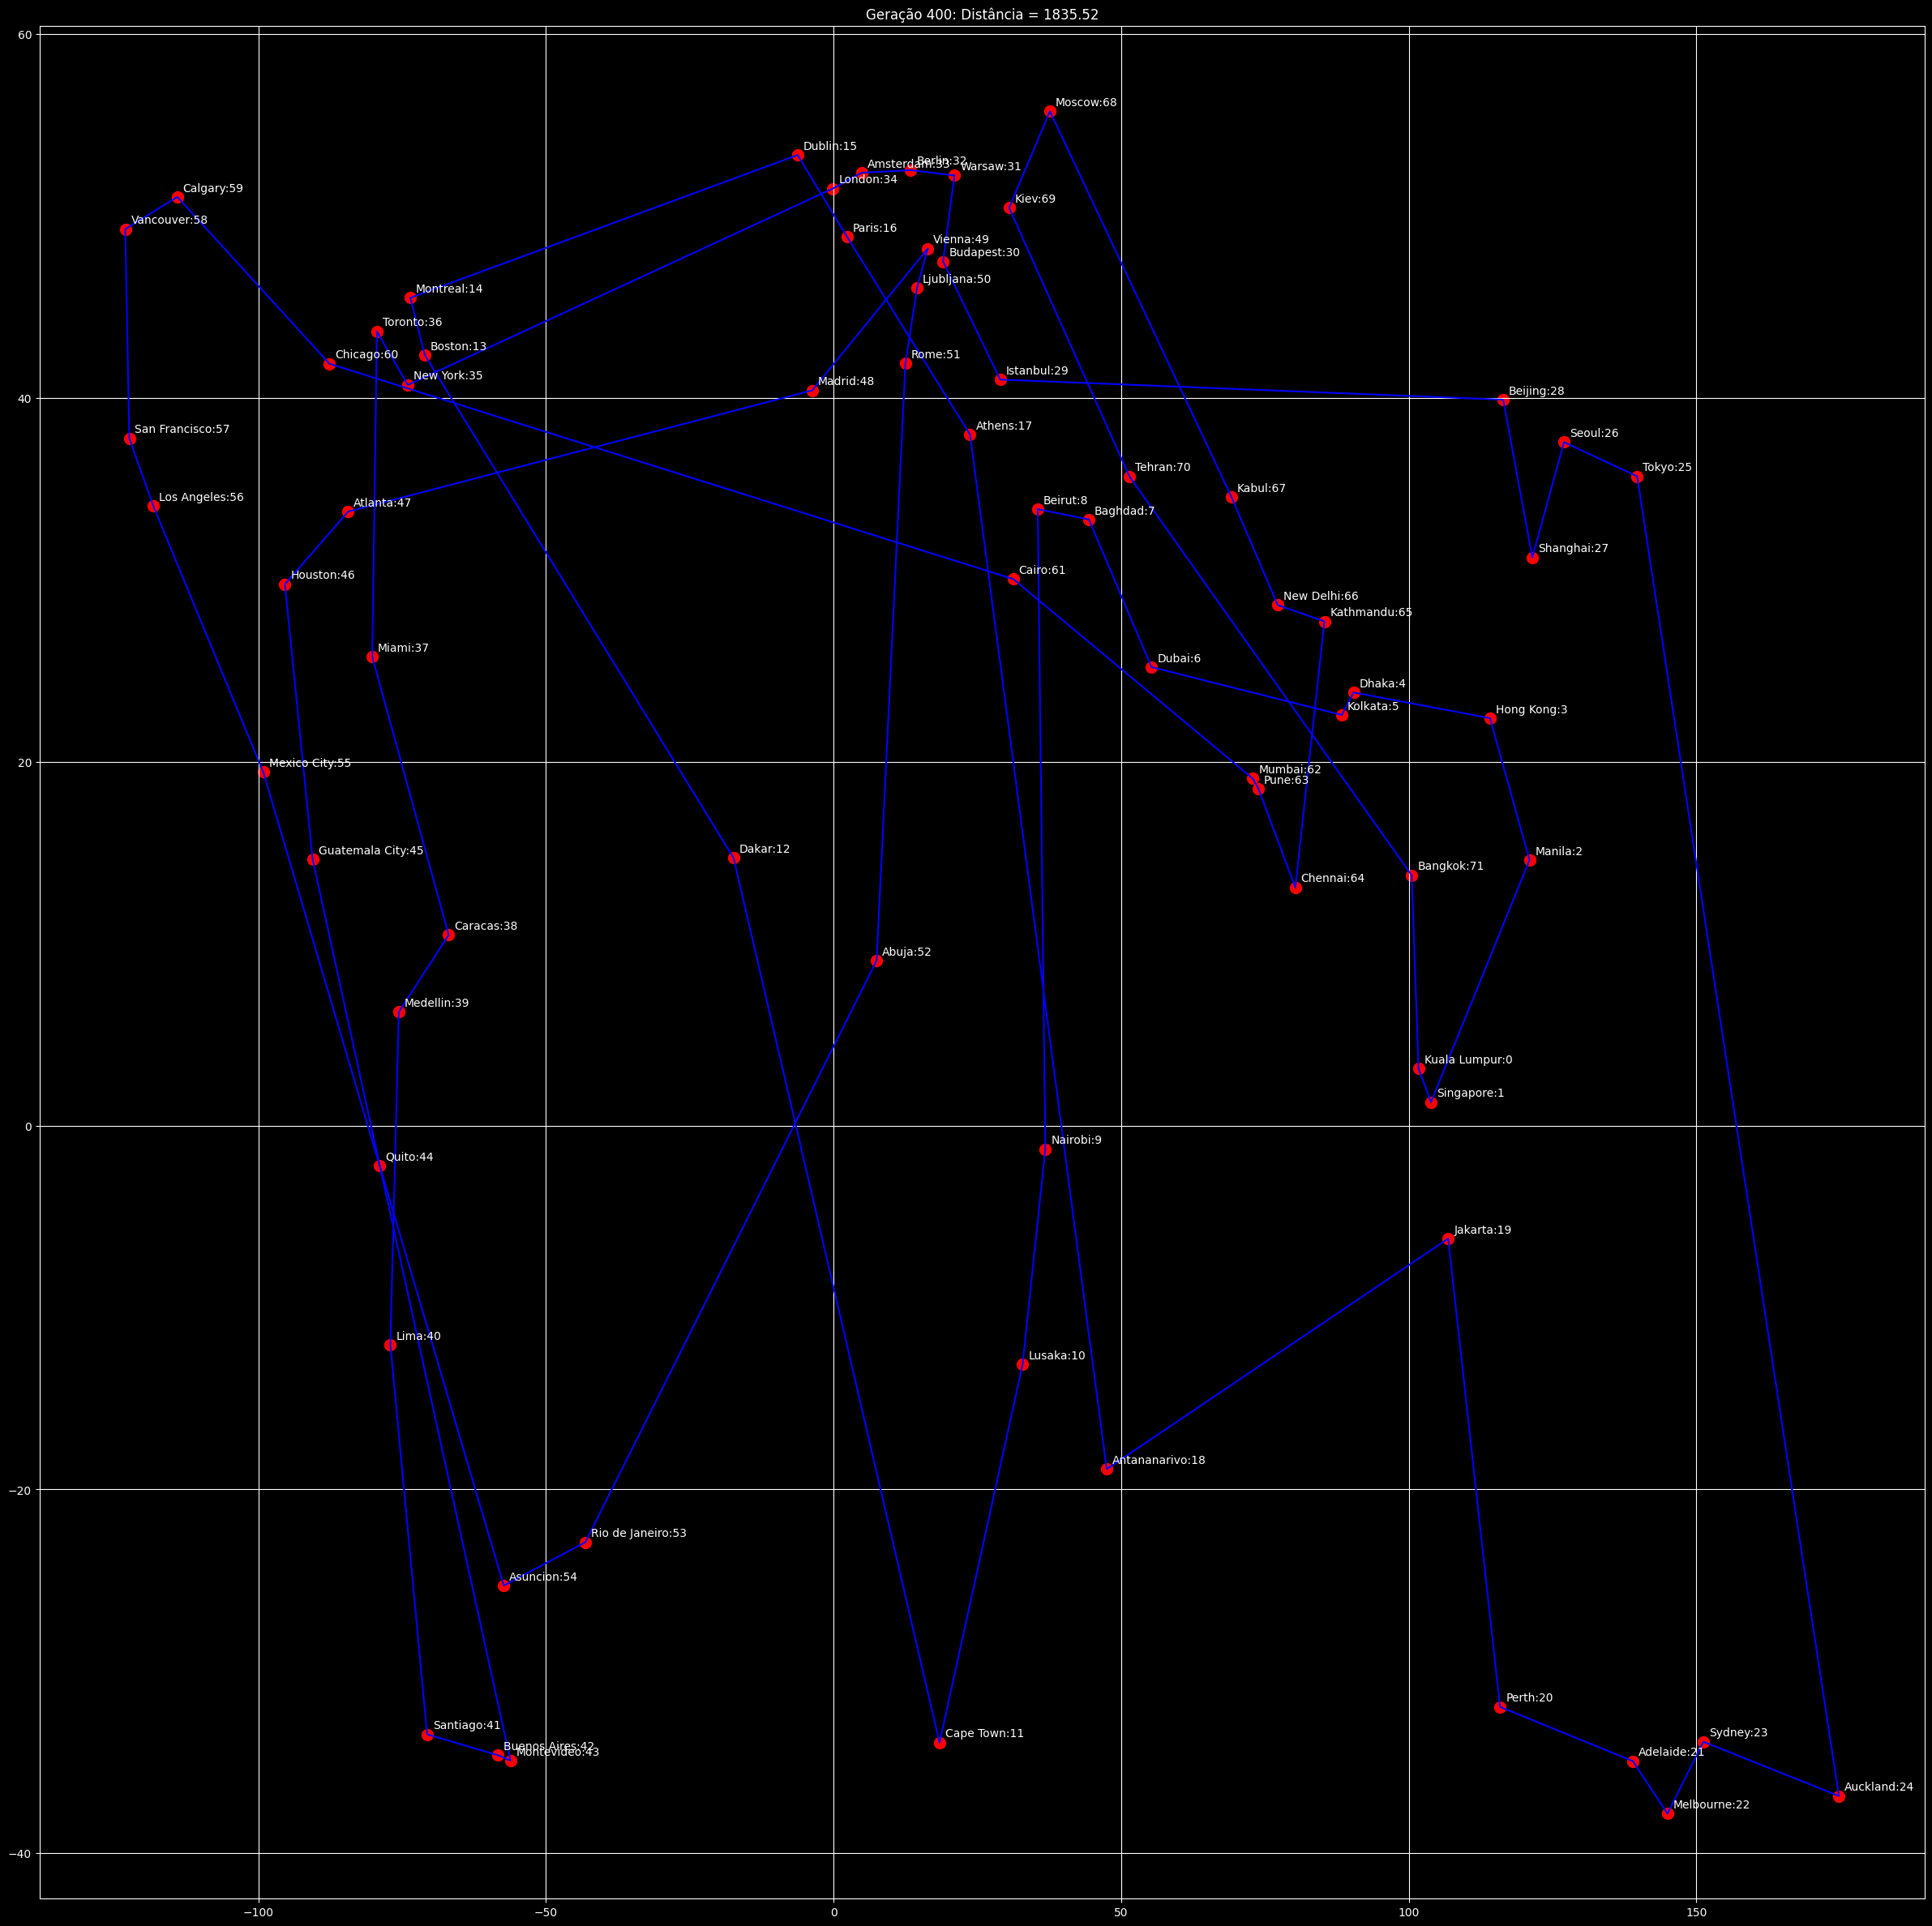

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (88.363, 22.572, 'Kolkata'), (55.27, 25.204, 'Dubai'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-17.384, 14.716, 'Dakar'), (-71.058, 42.36, 'Boston'), (-73.567, 45.501, 'Montreal'), (-6.249, 53.349, 'Dublin'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 'Amsterdam

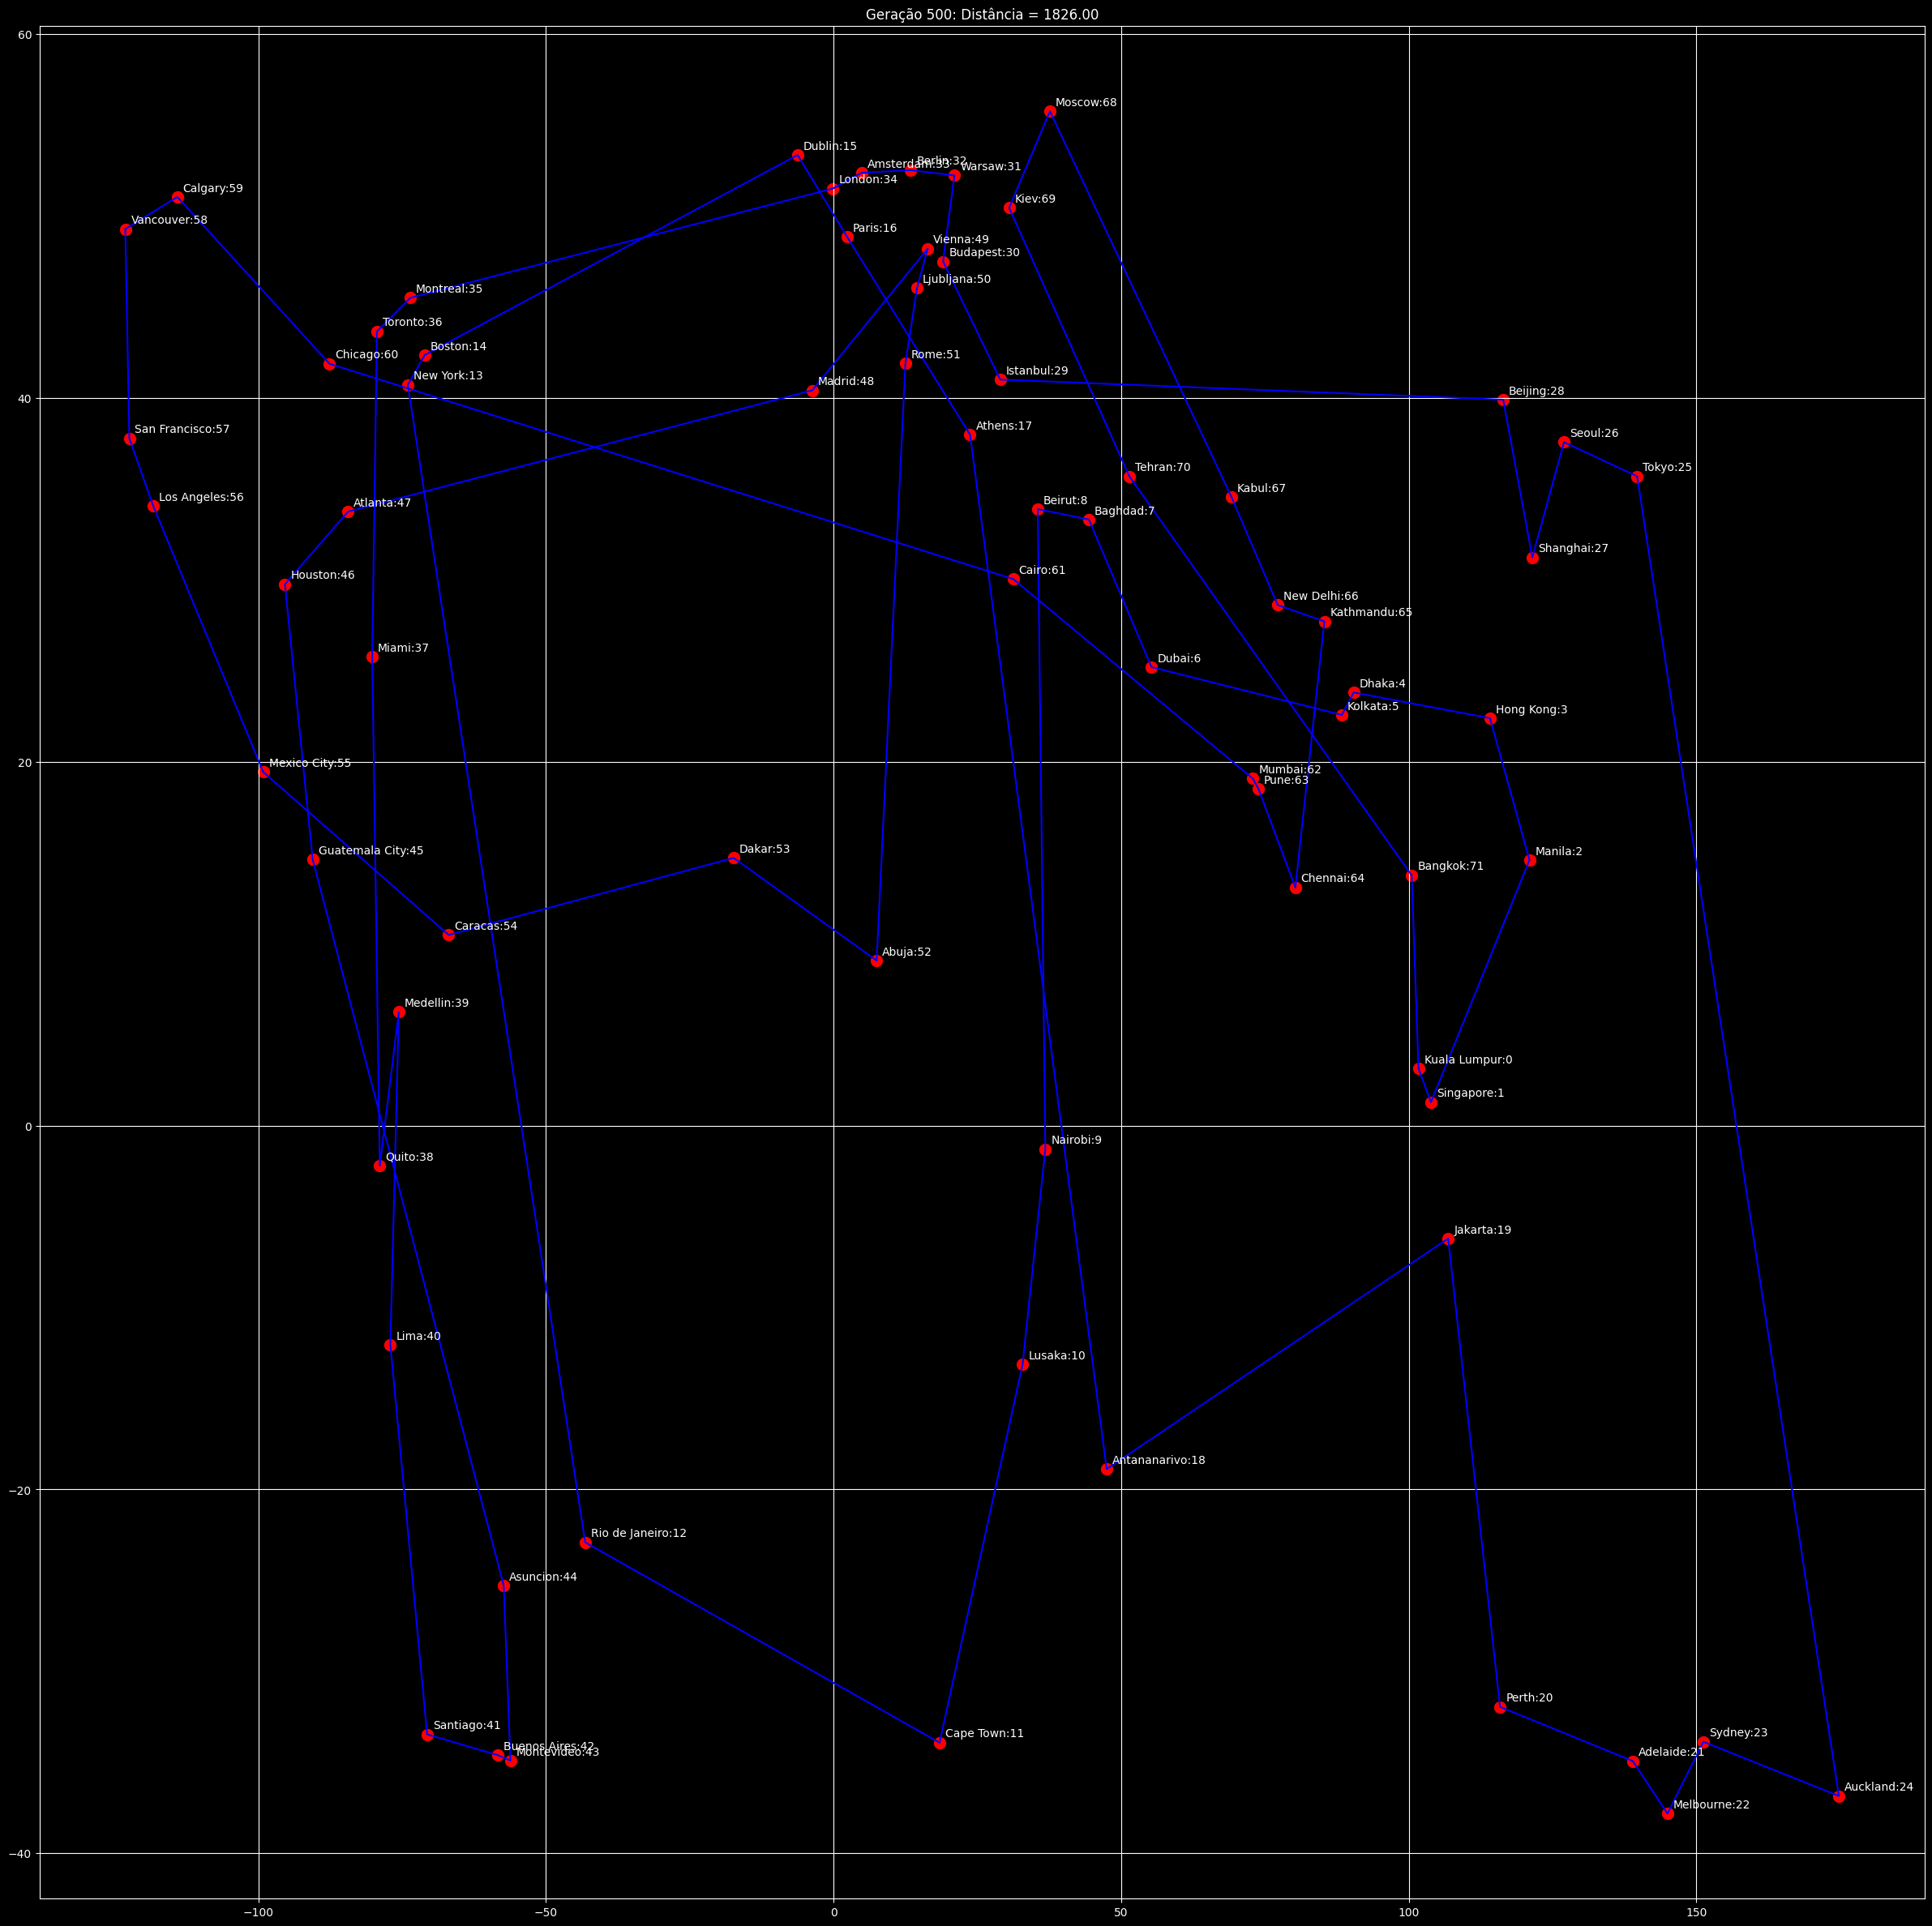

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (88.363, 22.572, 'Kolkata'), (55.27, 25.204, 'Dubai'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-43.172, -22.906, 'Rio de Janeiro'), (-74.006, 40.714, 'New York'), (-71.058, 42.36, 'Boston'), (-6.249, 53.349, 'Dublin'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 

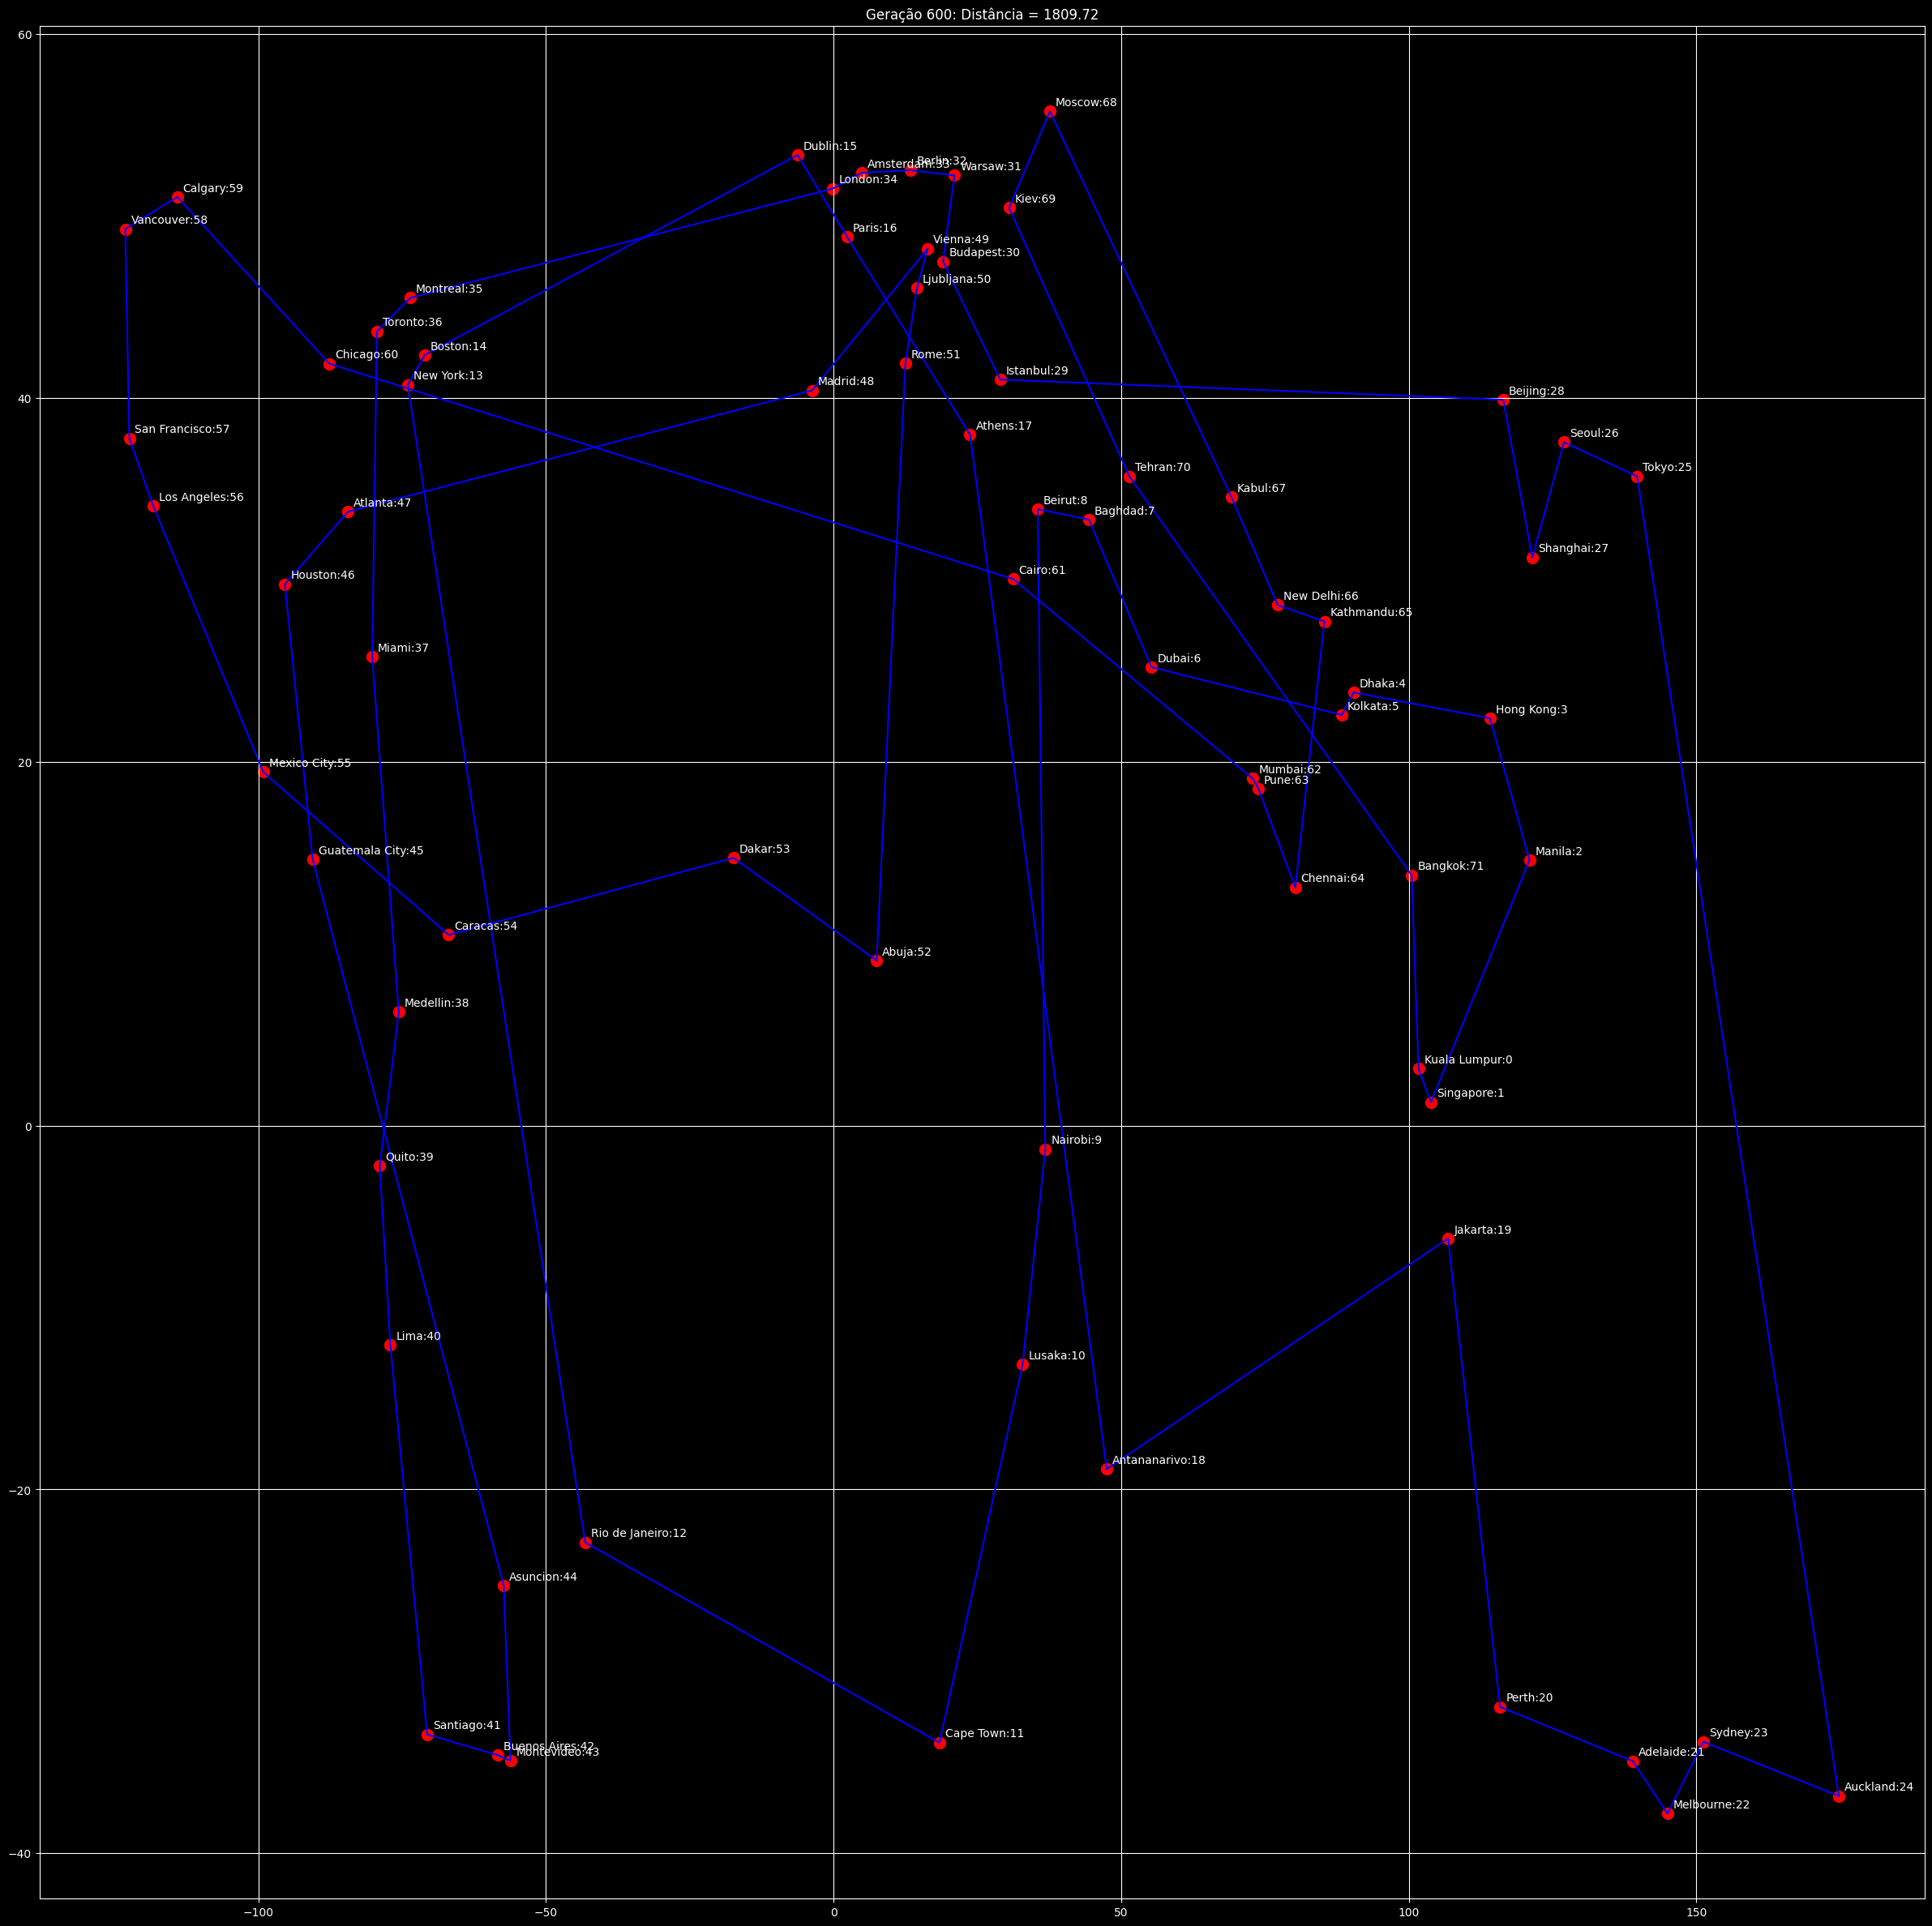

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (88.363, 22.572, 'Kolkata'), (55.27, 25.204, 'Dubai'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-43.172, -22.906, 'Rio de Janeiro'), (-74.006, 40.714, 'New York'), (-71.058, 42.36, 'Boston'), (-6.249, 53.349, 'Dublin'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 

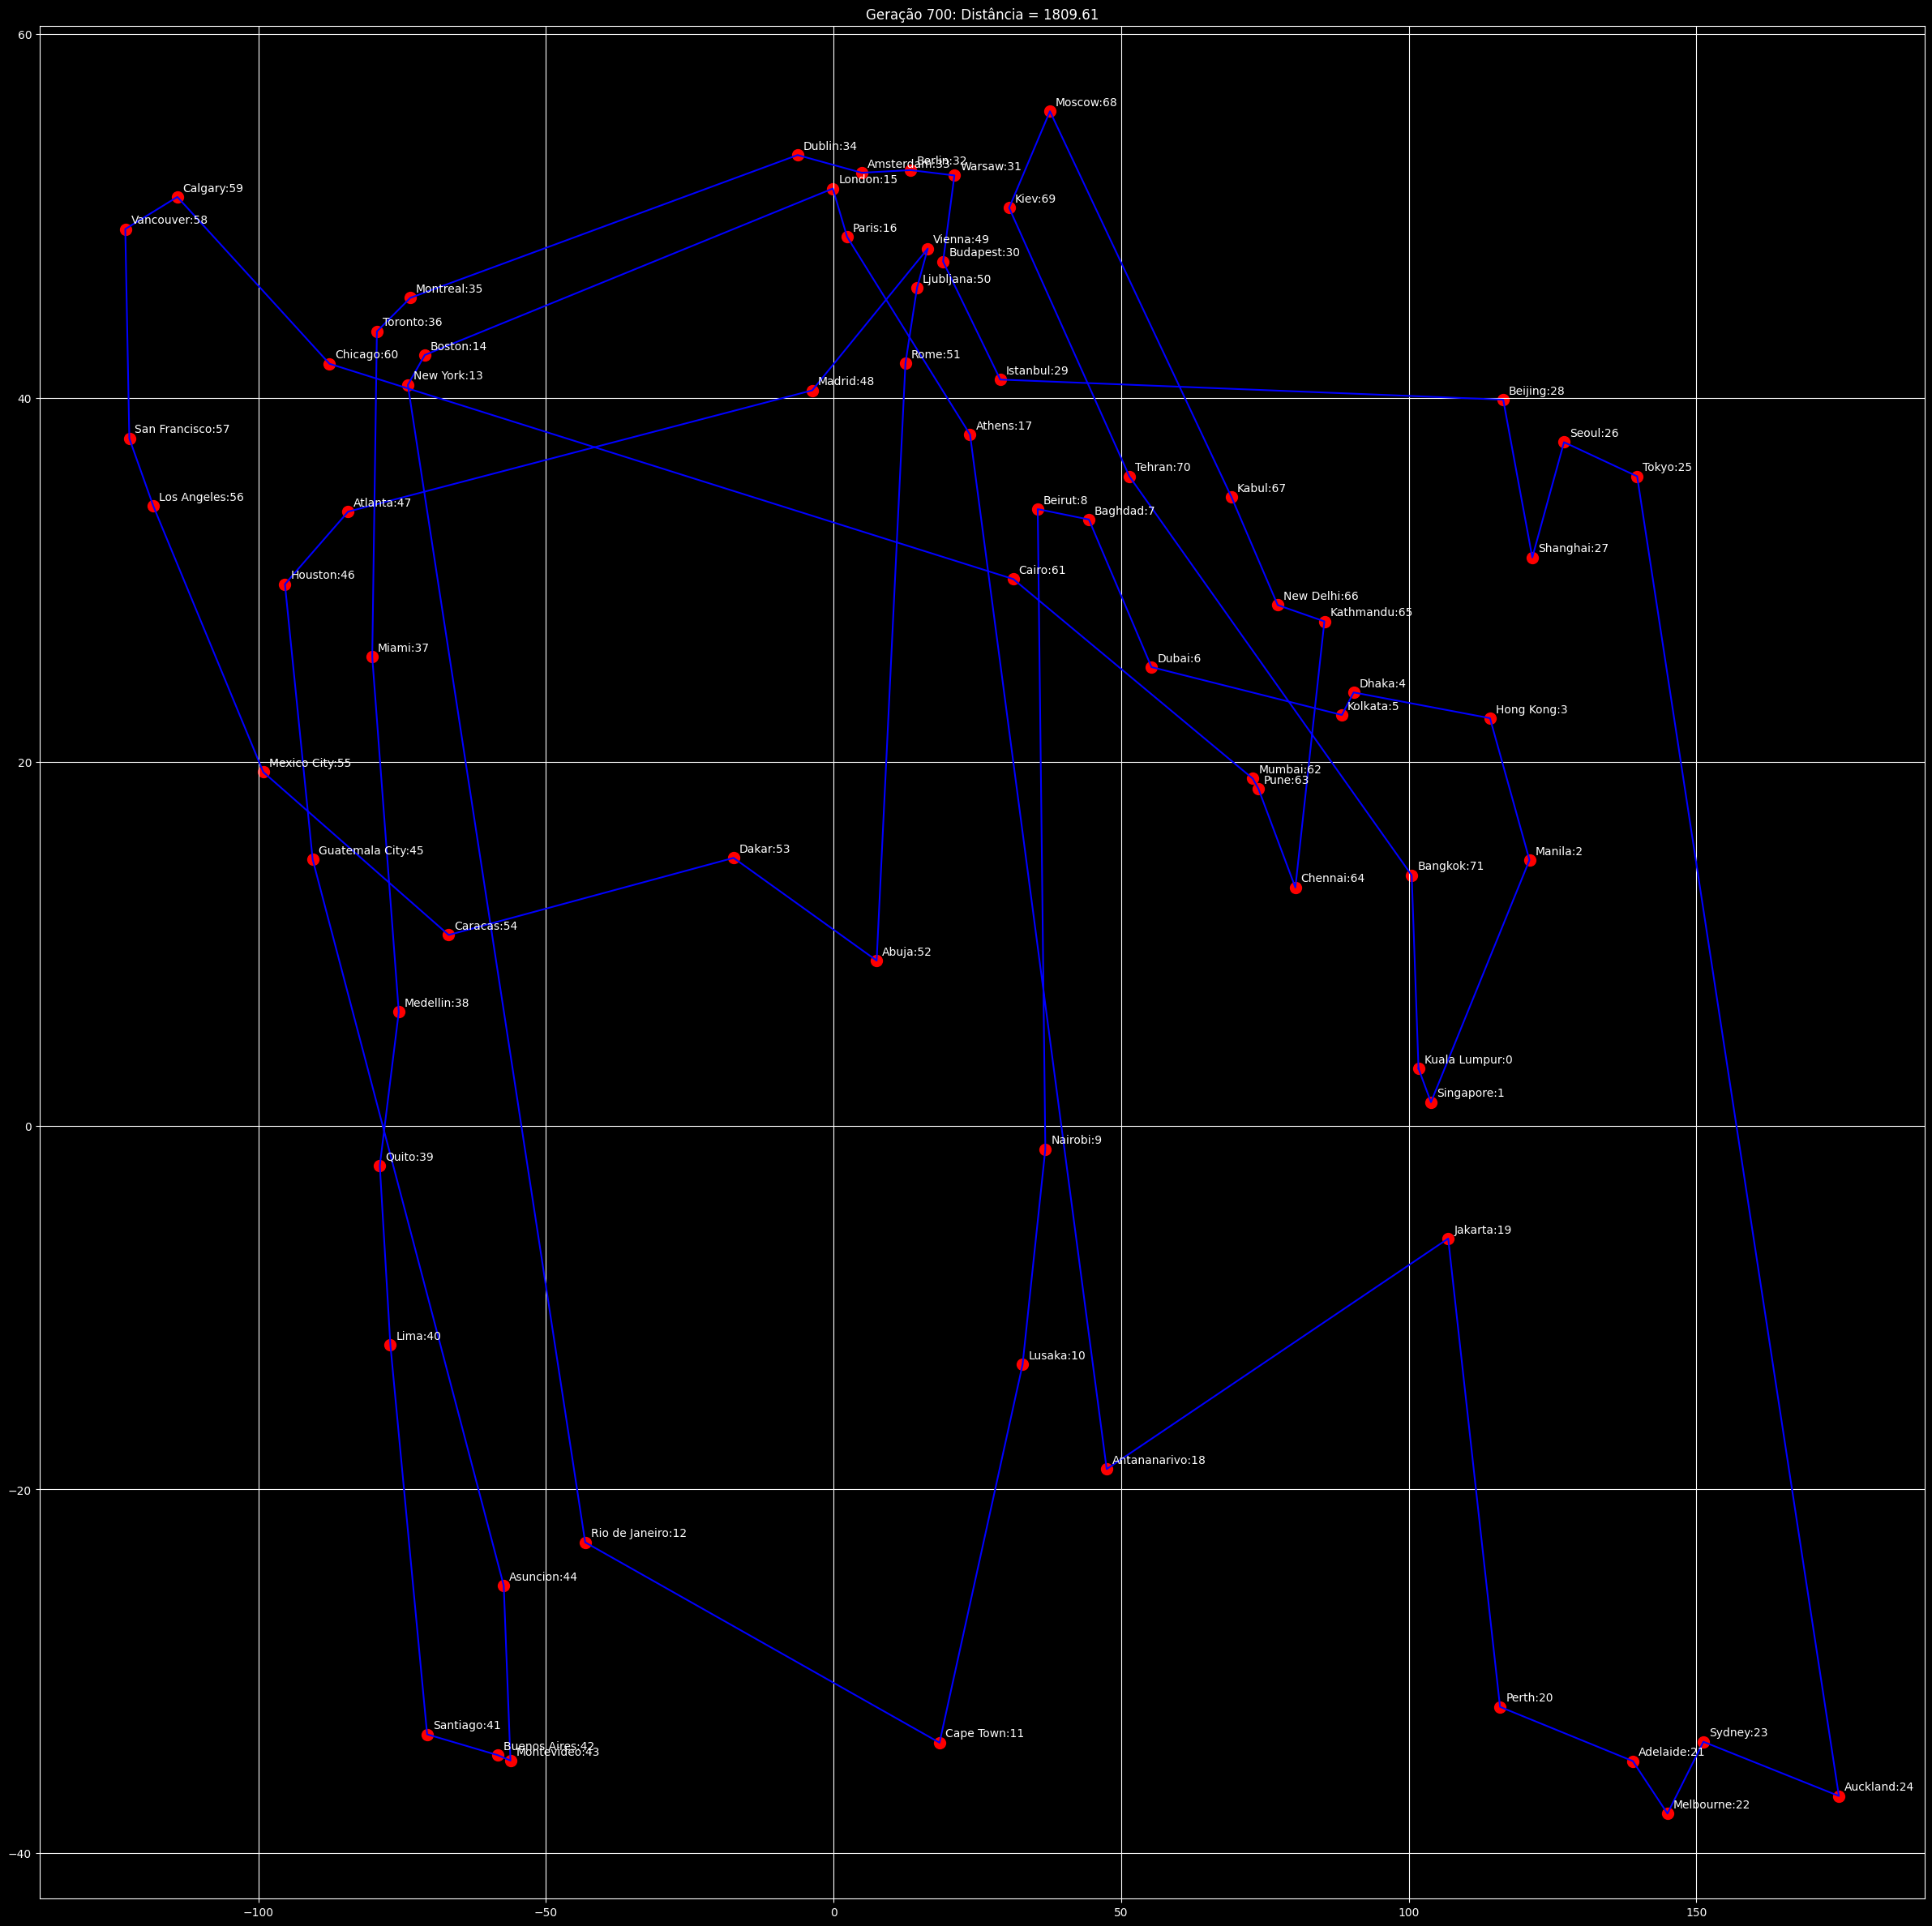

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (88.363, 22.572, 'Kolkata'), (55.27, 25.204, 'Dubai'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-43.172, -22.906, 'Rio de Janeiro'), (-74.006, 40.714, 'New York'), (-71.058, 42.36, 'Boston'), (-0.127, 51.507, 'London'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 

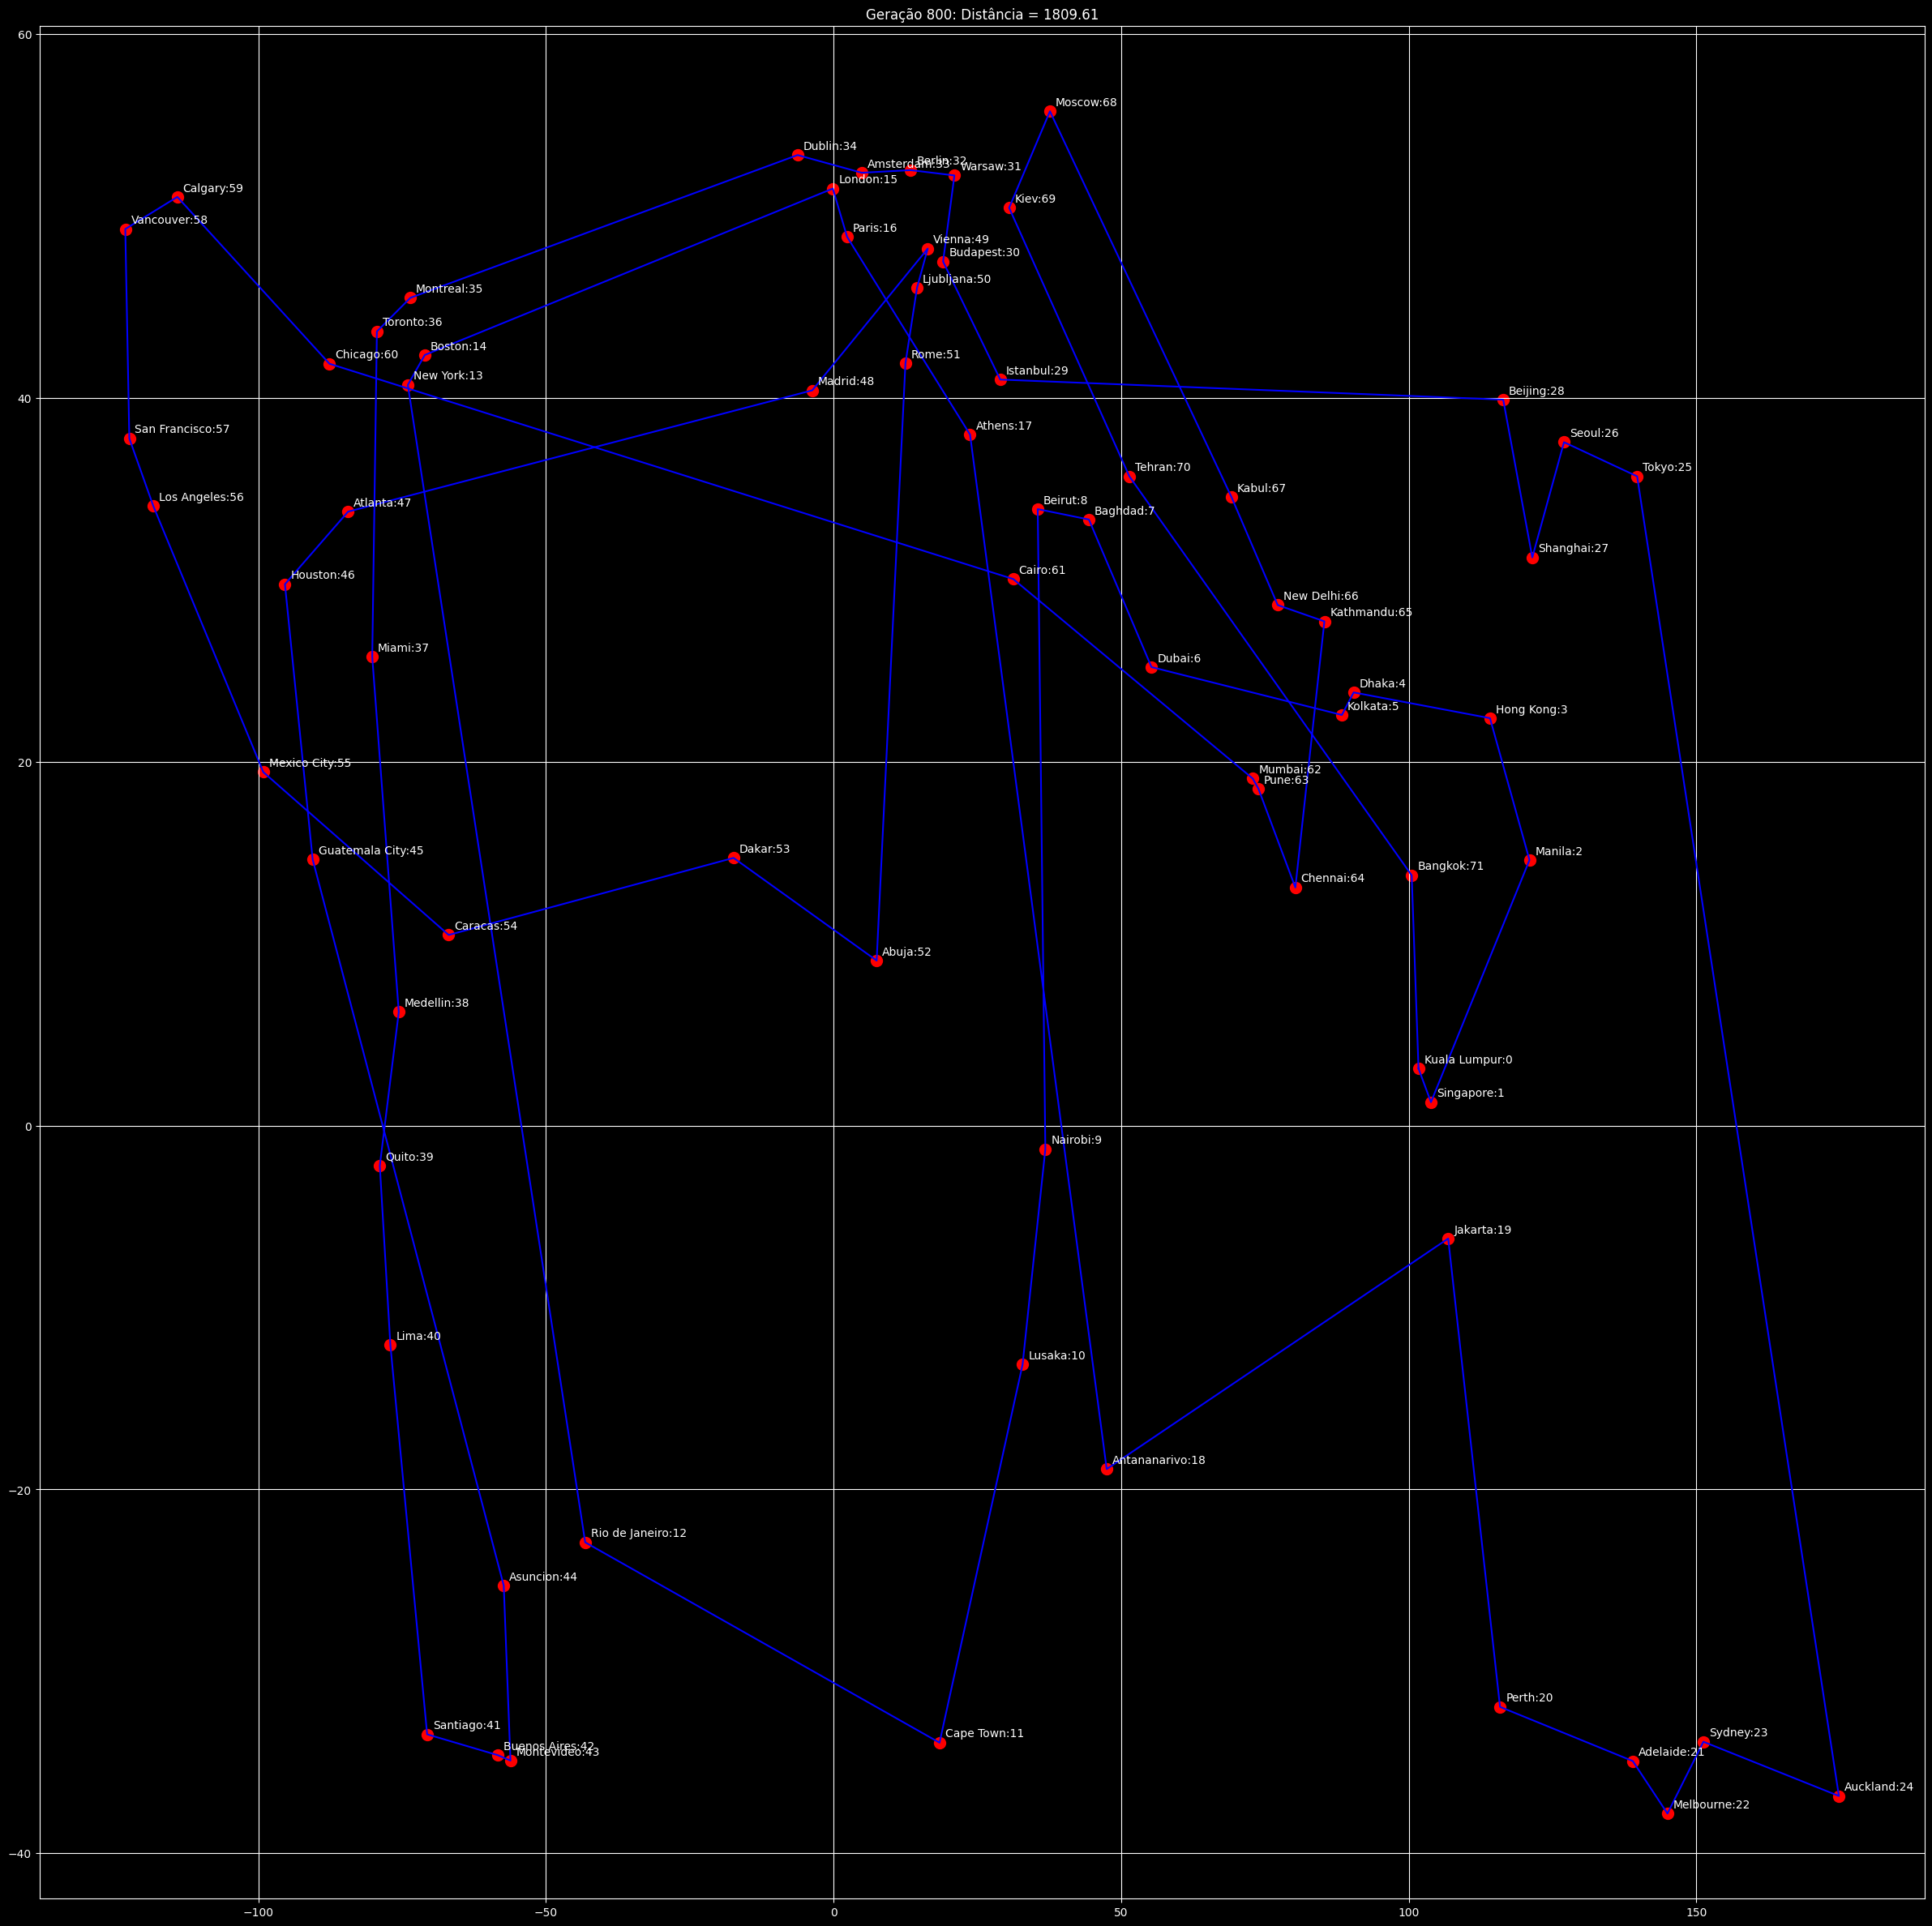

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (88.363, 22.572, 'Kolkata'), (55.27, 25.204, 'Dubai'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-43.172, -22.906, 'Rio de Janeiro'), (-74.006, 40.714, 'New York'), (-71.058, 42.36, 'Boston'), (-0.127, 51.507, 'London'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 

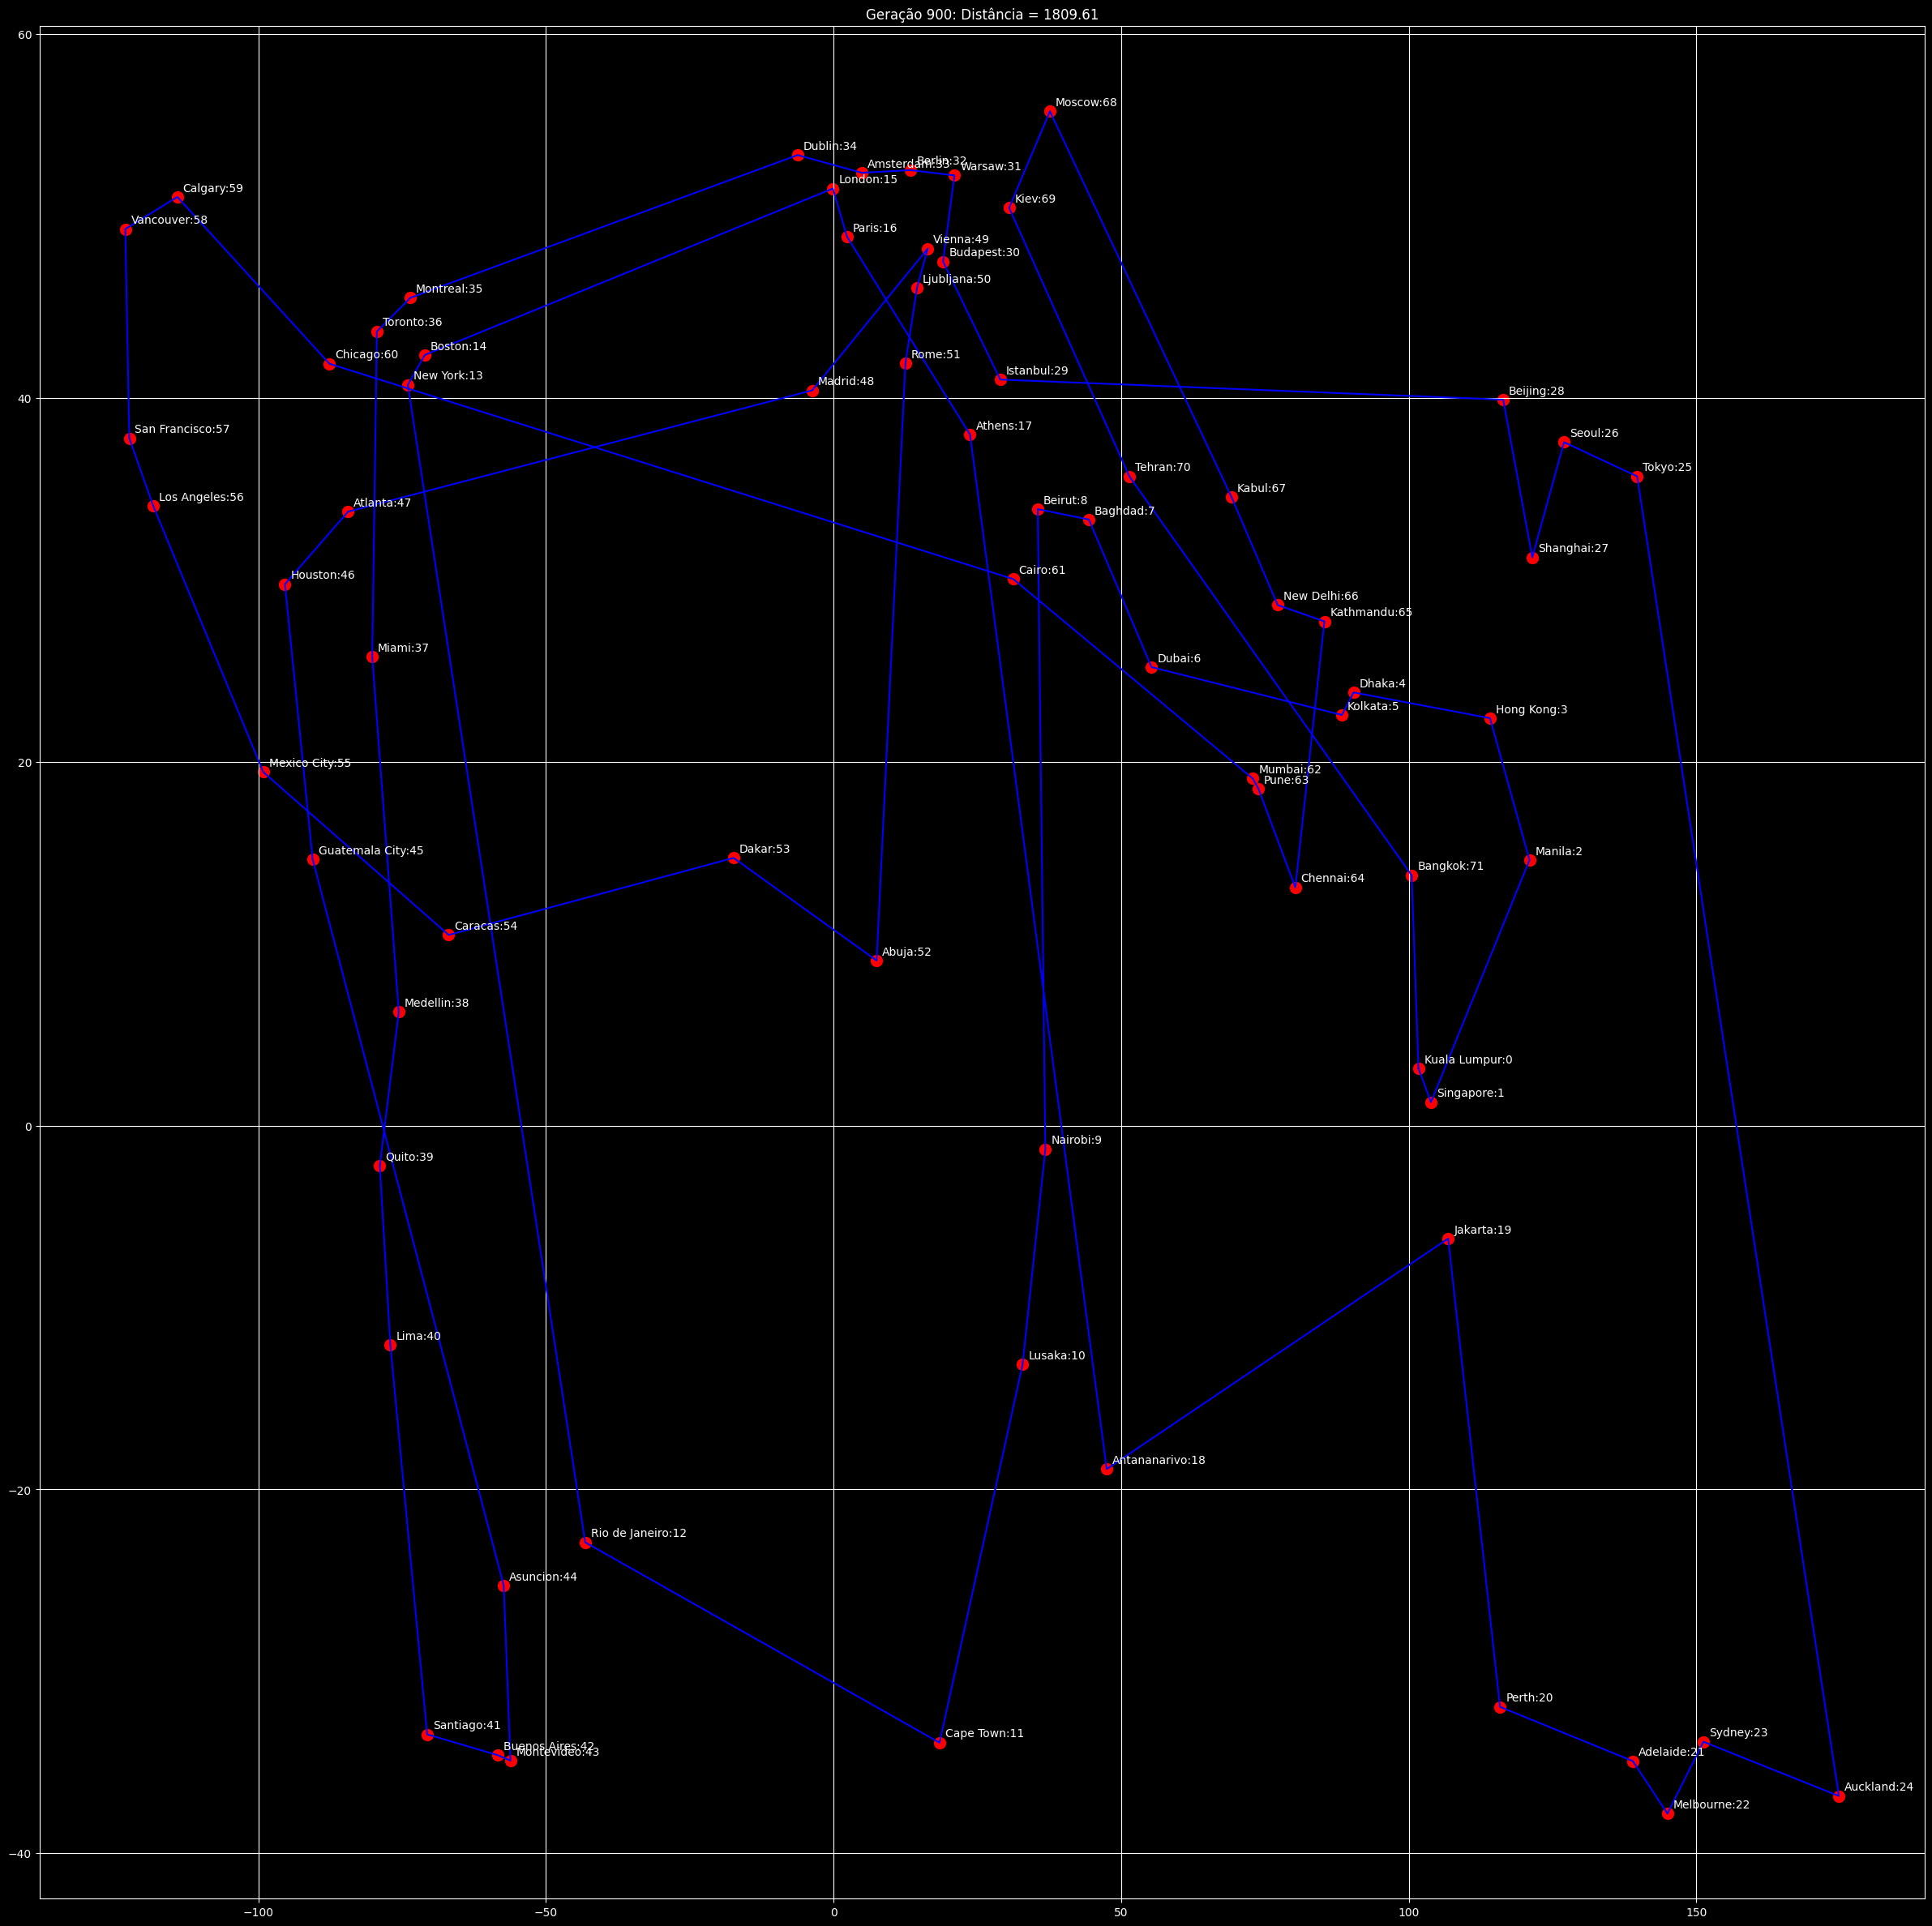

[(101.686, 3.139, 'Kuala Lumpur'), (103.851, 1.29, 'Singapore'), (120.979, 14.599, 'Manila'), (114.109, 22.396, 'Hong Kong'), (90.407, 23.811, 'Dhaka'), (88.363, 22.572, 'Kolkata'), (55.27, 25.204, 'Dubai'), (44.391, 33.315, 'Baghdad'), (35.495, 33.888, 'Beirut'), (36.817, -1.292, 'Nairobi'), (32.858, -13.133, 'Lusaka'), (18.423, -33.918, 'Cape Town'), (-43.172, -22.906, 'Rio de Janeiro'), (-74.006, 40.714, 'New York'), (-71.058, 42.36, 'Boston'), (-0.127, 51.507, 'London'), (2.352, 48.856, 'Paris'), (23.727, 37.983, 'Athens'), (47.481, -18.879, 'Antananarivo'), (106.845, -6.208, 'Jakarta'), (115.857, -31.95, 'Perth'), (138.933, -34.928, 'Adelaide'), (144.963, -37.814, 'Melbourne'), (151.207, -33.867, 'Sydney'), (174.763, -36.848, 'Auckland'), (139.691, 35.689, 'Tokyo'), (126.978, 37.566, 'Seoul'), (121.465, 31.23, 'Shanghai'), (116.407, 39.904, 'Beijing'), (28.979, 41.008, 'Istanbul'), (19.04, 47.497, 'Budapest'), (21.012, 52.229, 'Warsaw'), (13.404, 52.52, 'Berlin'), (4.897, 52.377, 

In [6]:
# Teste com 10 cidades
cities = default_problems[100]
best_route, best_distance, progress = solve_tsp(
    cities,
    population_size=100,  # Tamanho da população
    n_generations=1000,    # Número de gerações
    mutation_probability=0.3,  # Probabilidade de mutação
    plot_progress=True    # Mostrar progresso visual
)

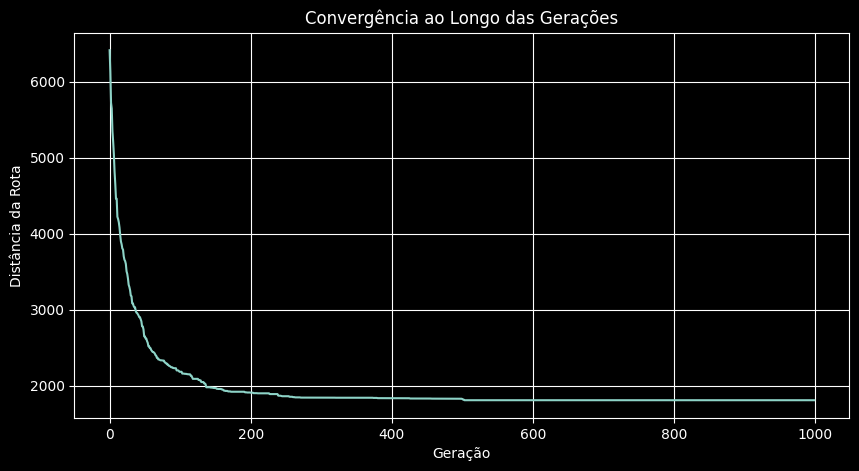

Distância final: 1809.61


In [7]:
# Plotar convergência
plt.figure(figsize=(10, 5))
plt.plot(progress)
plt.title('Convergência ao Longo das Gerações')
plt.xlabel('Geração')
plt.ylabel('Distância da Rota')
plt.grid(True)
plt.show()

print(f"Distância final: {best_distance:.2f}")